In [2]:
%matplotlib tk

In [57]:
%matplotlib inline

In [1]:
import pandas as pd
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import csv
import warnings
#import Levenshtein as lev
#import tsfresh
import math
import tensorflow as tf

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")



In [97]:
tsfresh.__version__

'0.20.1'

In [134]:
## Load acquisition 2

df = pd.read_csv(r'C:\Users\User\Documents\Niccolò\PoliMi\Tesi\new_dataFrame_v2.csv')

ground_truth_df = pd.read_csv(r'C:\Users\User\Documents\Niccolò\PoliMi\Tesi\ground_truth_v2.csv')
ground_truth_df = ground_truth_df.rename(columns={'0': 'Action'})
if 'Unnamed: 0' in ground_truth_df.columns:
    ground_truth_df = ground_truth_df.drop(columns=['Unnamed: 0'])

df = df.merge(ground_truth_df[['Action']], left_index=True, right_index=True, how='left')
grouped = df.groupby('Source Zigbee')['Action'].apply(set)

devices = ['0x0000', '0x265e', '0x3181', '0x0a79', '0xb815', '0x4e52', '0x9989', '0x5db6', '0x772c', '0x61af', '0xe011', '0xe694',
            '0x6e5f', '0xc8f0', '0x09ac', '0x82eb', '0x054f', '0xebe5',  '0xe5c4', '0x482d', '0xa209', '0x2cae']

devices_name = ['Coordinator', 'Sonoff Temperature', 'Sonoff Door', 'Sonoff Door', 'Sonoff Motion', 'Sonoff Motion', 'Aqara Motion', 'Aqara Door', 'Aqara Door', 'Aqara Vibration', 
                'Aqara Button', 'Smart Socket', 'Power Plug', 'Power Plug', 'Ledvance Z3 Plug', 'Ledvance Smart+ Plug', 'Ledvance Bulb', 'Moes Bulb',  'Philips Lamp', 'Philips Lamp', 'Philips Lamp', 'Philips Motion']

device_type_mapping = {
    '0x0000' : 'Coordinator',
    '0x09ac' : 'Socket',
    '0x5db6' : 'Door',
    '0xe694' : 'Socket',
    '0x772c' : 'Door',
    '0x61af' : 'Vibration',
    '0xe011' : 'Button',
    '0x9989' : 'Motion',
    '0x265e' : 'Temperature',
    '0xb815' : 'Motion',
    '0x4e52' : 'Motion',
    '0x3181' : 'Door',
    '0x0a79' : 'Door',
    '0x82eb' : 'Socket',
    '0x6e5f' : 'Socket',
    '0xc8f0' : 'Socket',
    '0xebe5' : 'Bulb',
    '0x054f' : 'Bulb',
    '0x482d' : 'Bulb',
    '0xa209' : 'Bulb',
    '0x2cae' : 'Motion',
    '0xe5c4' : 'Bulb'
}

device_name_mapping = {
    '0x0000' : 'Coordinator',
    '0x09ac' : 'Ledvance Z3 Plug',
    '0x5db6' : 'Aqara Door',
    '0xe694' : 'Smart Socket',
    '0x772c' : 'Aqara Door',
    '0x61af' : 'Aqara Vibration',
    '0xe011' : 'Aqara Button',
    '0x9989' : 'Aqara Motion',
    '0x265e' : 'Sonoff Temperature',
    '0xb815' : 'Sonoff Motion',
    '0x4e52' : 'Sonoff Motion',
    '0x3181' : 'Sonoff Door',
    '0x0a79' : 'Sonoff Door',
    '0x82eb' : 'Ledvance Smart+ Plug',
    '0x6e5f' : 'Power Plug',
    '0xc8f0' : 'Power Plug',
    '0xebe5' : 'Moes Bulb',
    '0x054f' : 'Ledvance Bulb',
    '0x482d' : 'Philips Lamp',
    '0xa209' : 'Philips Lamp',
    '0x2cae' : 'Philips Lamp',
    '0xe5c4' : 'Philips Motion'
}

threshold = timedelta(days=0, hours=0, seconds=0, microseconds=71482)
threshold_float = 0.071482

In [130]:
## Load acquisition 4

df = pd.read_csv(r'C:\Users\User\Documents\Niccolò\PoliMi\Tesi\final_dataFrame_v4.csv')

ground_truth_df = pd.read_csv(r'C:\Users\User\Documents\Niccolò\PoliMi\Tesi\ground_truth_v4.csv')
ground_truth_df = ground_truth_df.rename(columns={'0': 'Action'})
if 'Unnamed: 0' in ground_truth_df.columns:
    ground_truth_df = ground_truth_df.drop(columns=['Unnamed: 0'])

df = df.merge(ground_truth_df[['Action']], left_index=True, right_index=True, how='left')
grouped = df.groupby('Source Zigbee')['Action'].apply(set)

devices = ['0x0000', '0x4615', '0x946e', '0x7b10', '0xd0bb', '0x1f29', '0x27d7', '0x907b', '0xe01d', '0x187a', '0xc31c',
           '0xe1a6', '0x3d95', '0xa706', '0x4e11', '0x0112', '0xec7f', '0x1e15', '0x1cd8', '0x5bb9', '0x711c', '0x059b']

devices_name = ['Coordinator', 'Sonoff Temperature', 'Sonoff Door', 'Sonoff Door', 'Sonoff Motion', 'Sonoff Motion', 'Aqara Motion', 'Aqara Door', 'Aqara Door', 'Aqara Vibration', 'Aqara Button',
                'Smart Socket', 'Power Plug', 'Power Plug', 'Ledvance Z3 Plug', 'Ledvance Smart+ Plug', 'Ledvance Bulb', 'Moes Bulb', 'Philips Lamp', 'Philips Lamp', 'Philips Lamp', 'Philips Motion']

device_type_mapping = {
    '0x0000': 'Coordinator',
    '0x4615': 'Temperature',
    '0x946e': 'Door',
    '0x7b10': 'Door',
    '0xd0bb': 'Motion',
    '0x1f29': 'Motion',
    '0x27d7': 'Motion',
    '0x907b': 'Door',
    '0xe01d': 'Door',
    '0x187a': 'Vibration',
    '0xc31c': 'Button',
    '0xe1a6': 'Socket',
    '0x3d95': 'Socket',
    '0xa706': 'Socket',
    '0x4e11': 'Socket',
    '0x0112': 'Socket',
    '0xec7f': 'Bulb',
    '0x1e15': 'Bulb',
    '0x1cd8': 'Bulb',
    '0x5bb9': 'Bulb',
    '0x711c': 'Bulb',
    '0x059b': 'Motion'    
}

device_name_mapping = {
    '0x0000': 'Coordinator',
    '0x4615': 'Sonoff Temperature',
    '0x946e': 'Sonoff Door',
    '0x7b10': 'Sonoff Door',
    '0xd0bb': 'Sonoff Motion',
    '0x1f29': 'Sonoff Motion',
    '0x27d7': 'Aqara Motion',
    '0x907b': 'Aqara Door',
    '0xe01d': 'Aqara Door',
    '0x187a': 'Aqara Vibration',
    '0xc31c': 'Aqara Button',
    '0xe1a6': 'Smart Socket',
    '0x3d95': 'Power Plug',
    '0xa706': 'Power Plug',
    '0x4e11': 'Ledvance Z3 Plug',
    '0x0112': 'Ledvance Smart+ Plug',
    '0xec7f': 'Ledvance Bulb',
    '0x1e15': 'Moes Bulb',
    '0x1cd8': 'Philips Lamp',
    '0x5bb9': 'Philips Lamp',
    '0x711c': 'Philips Lamp',
    '0x059b': 'Philips Motion' 
}

threshold = timedelta(days=0, hours=0, seconds=0, microseconds=63446)
threshold_float = 0.063446

In [6]:
# Priority ranking for commands

command_priorities = {
    'Sonoff Temperature': {
        'Report Attributes (0x0a)': 3,
    },

    'Sonoff Door': {
        'Zone Status Change Notification (0x00)': 3,
        'Report Attributes (0x0a)': 2,
    },

    'Sonoff Motion': {
        'Zone Status Change Notification (0x00)': 7,
        'Report Attributes (0x0a)': 6,
        'Zone Enroll Request (0x01)': 5,
        'Rejoin Request (0x06)': 4,
        'zdp': 3,
        'Ack': 2,
        'Route Record (0x05)': 1,
    },

    'Aqara Motion': {
        'Report Attributes (0x0a)': 3,
    },

    'Aqara Door': {
        'Report Attributes (0x0a)': 3,
    },

    'Aqara Vibration': {
        'Report Attributes (0x0a)': 5,
        'Rejoin Request (0x06)': 4,
        'zdp': 3,
        'Ack': 2,
        'Route Record (0x05)': 1,
    },

    'Aqara Button': {
        'Report Attributes (0x0a)': 2,
        'Route Record (0x05)': 1,
    },

    'Smart Socket': {
        'Report Attributes (0x0a)': 9,
        'Read Attributes Response (0x01)': 9,
        'Read Attributes (0x00)': 8,
        'Default Response (0x0b)': 7,
        'APS: Ack': 6,
        'Ack': 5,
        'Rejoin Response (0x07)': 4,
        'Route Reply (0x02)': 3,
        'zdp': 2,
        'Link Status': 1,
    },

    'Power Plug': {
        'Read Attribute Response (0x01)': 9,
        'Report Attributes (0x0a)': 9,
        'Read Attributes (0x00)': 8,
        'Default Response (0x0b)': 7,
        'APS: Ack': 6,
        'Ack': 5,
        'Network Status (0x03)': 4,
        'Route Reply (0x02)': 3,
        'zdp': 2,
        'Link Status': 1,
    },

    'Ledvance Z3 Plug': {
        'Link Status': 1,
        'Route Record (0x05)': 6,
        'Ack': 7,
        'Report Attributes (0x0a)': 10,
        'APS: Ack': 8,
        'zdp': 2,
        'Default Response (0x0b)': 9,
        'Route Reply (0x02)': 3,
        'Network Status (0x03)': 4,
        'Get Group Membership Response (0x02)': 5,
    },

    'Ledvance Smart+ Plug': {
        'Link Status': 2,
        'Report Attributes (0x0a)': 10,
        'Ack': 7,
        'zdp': 3,
        'Default Response (0x0b)': 9,
        'Route Reply (0x02)': 4,
        '---': 1,
        'Get Group Membership Response (0x02)': 6,
        'APS: Ack': 8,
        'Rejoin Response (0x07)': 5,
    },

    'Ledvance Bulb': {
        'Link Status': 1,
        'Ack': 7,
        'Route Record (0x05)': 6,
        'APS: Ack': 8,
        'zdp': 2,
        'Report Attributes (0x0a)': 11,
        'Default Response (0x0b)': 9,
        'Route Reply (0x02)': 3,
        'Network Status (0x03)': 4,
        'Read Attributes Response (0x01)': 10,
        'Get Group Membership Response (0x02)': 5,
    },

    'Moes Bulb': {
        'Link Status': 1,
        'Ack': 4,
        'Default Response (0x0b)': 8,
        'Read Attribute Response (0x01)': 6,
        'Report Attributes (0x0a)': 7,
        'APS: Ack': 5,
        'zdp': 2,
        'Route Reply (0x02)': 3,
    },

    'Philips Lamp': {
        'Link Status': 2,
        'Route Record (0x05)': 7,
        'zdp': 3,
        'Ack': 8,
        'Read Attributes Response (0x01)': 10,
        'Report Attributes (0x0a)': 11,
        'APS: Ack': 9,
        'Default Response (0x0b)': 12,
        'Get Group Membership Response (0x02)': 6,
        'Route Reply (0x02)': 5,
        'Rejoin Response (0x07)': 4,
        '---': 1,
    },

    'Philips Motion': {
        'Report Attributes (0x0a)': 6,
        'APS: Ack': 5,
        'Route Record (0x05)': 2,
        'Ack': 4,
        'zdp': 1,
        'Rejoin Request (0x06)': 3,
    },

    'Coordinator': {
        'Read Attributes (0x00)': 11,
        'Ack': 7,
        'APS: Ack': 8,
        'Link Status': 1,
        'Default Response (0x0b)': 9,
        'zdp': 2,
        'On (0x01)': 12,
        'Move To Level with OnOff (0x04)': 14,
        'Off (0x00)': 12,
        'Route Reply (0x02)': 3,
        'Move To Color (0x07)': 13,
        'Get Group Membership (0x02)': 4,
        'Move To Color Temperature (0x0a)': 14,
        'Read Attributes Response (0x01)': 10,
        'Configure Reporting (0x06)': 5,
        'Color Loop Set (0x44)': 15,
        'Rejoin Response (0x07)': 6,
    },
}

def get_highest_priority_action(device_name, action_list):
    if device_name in command_priorities:
        # Get the priorities for the specified device
        device_priorities = command_priorities[device_name]

        # Filter the action list to include only those present in the priorities
        valid_actions = [action for action in action_list if action in device_priorities]

        if valid_actions:
            # Find the action with the highest priority
            highest_priority_action = max(valid_actions, key=lambda action: device_priorities[action])
            return highest_priority_action
        else:
            return '---'  # No valid actions found in the priorities
    else:
        return None  # Device not found in the command_priorities dictionary

In [17]:
## Create the training and test sets

from sklearn.model_selection import train_test_split

X = df.drop(columns=['Extended Source'])
y = df['Extended Source']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.to_csv('train.csv', index=False)
X_test.to_csv('test.csv', index=False)
y_train.to_csv('train_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

In [4]:
X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')
y_train = pd.read_csv('train_labels.csv')
y_test = pd.read_csv('test_labels.csv')

In [4]:
## List of devices from acquisition 1

devices = ['0xee9c', '0xaea8', '0x43f8', '0xa7f2', '0xb6ee', '0x234c', '0x8efb', '0x4aee', '0x9c97', '0xdd18',
            '0x8c99', '0xa8d4', '0x235e', '0xff91', '0xdad3', '0xa848', '0x97b8', '0x264a', '0x310d']

In [60]:
import tikzplotlib

def save_tikzplotlib(fig,path):
    def tikzplotlib_fix_ncols(obj):
        """
        workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
        """
        if hasattr(obj, "_ncols"):
            obj._ncol = obj._ncols
        for child in obj.get_children():
            tikzplotlib_fix_ncols(child)
    tikzplotlib_fix_ncols(fig)
    tikzplotlib.save(path)

In [49]:
type(df.loc[0, 'Payload Length'])

float

In [6]:
## Add source zigbee and destination zigbee to ack packets
seq_no = df.loc[0,'Sequence Number']

for i in range(1, len(df)):
    seq_no1 = df.loc[i,'Sequence Number']
    if seq_no1 == seq_no and df.loc[i,'FCF IEEE'] == '0x0002':
        df.loc[i,'Source Zigbee'] = df.loc[i-1,'Destination Zigbee']
        df.loc[i,'Destination Zigbee'] = df.loc[i-1,'Source Zigbee']
    seq_no = seq_no1
    if(np.isnan(df.loc[i, 'Payload Length'])):
        df.loc[i, 'Payload Length'] = 0

In [7]:
df.to_csv('final_dataFrame_v4.csv', index=False)

The 95th percentile value is 2523.0 microseconds


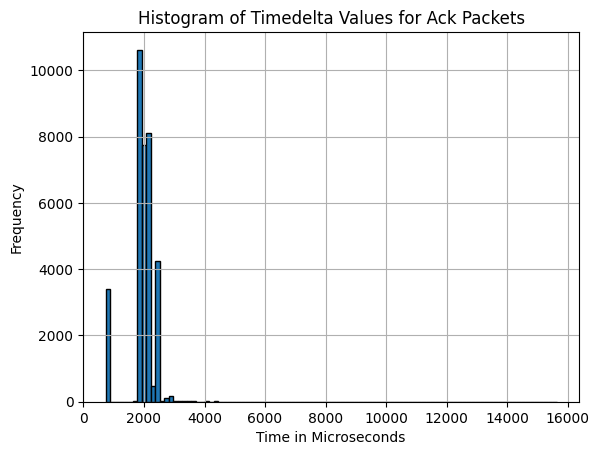

In [47]:
## Calculate the time delta between packets with the same sequence number (packet and corresponding ack)
df.sort_values(by=['Time'])
seq_no = df.loc[0,'Sequence Number']
date_string = df.loc[0,'Time']
date_format = "%b %d, %Y %H:%M:%S.%f"
date_object = datetime.strptime(date_string, date_format)

list_of_timedelta = []

for i in range(1, len(df)):
    seq_no1 = df.loc[i,'Sequence Number']
    date_string = df.loc[i,'Time']
    date_object1 = datetime.strptime(date_string, date_format)
    if seq_no1 == seq_no and df.loc[i,'FCF IEEE'] == '0x0002':
        list_of_timedelta.append(date_object1 - date_object)
    date_object = date_object1
    seq_no = seq_no1

threshold = timedelta(days=0, hours=0, seconds=0, microseconds=20000)
second_threshold = timedelta(days=0, hours=0, seconds=0, microseconds=0)
filtered_timedelta = [td for td in list_of_timedelta if td < threshold]
filtered_timedelta = [td for td in filtered_timedelta if td > second_threshold]
filtered_timedelta_micro = [td.microseconds for td in filtered_timedelta]

plt.hist(filtered_timedelta_micro, bins=100, edgecolor='k')
plt.xlabel('Time in Microseconds')
plt.ylabel('Frequency')
plt.title('Histogram of Timedelta Values for Ack Packets')
plt.grid(True)

hist, bin_edges = np.histogram(filtered_timedelta_micro, bins=100)
cdf = np.cumsum(hist) / np.sum(hist)

percentile_bin = np.where(cdf > 0.95)[0][0]

percentile_value = bin_edges[percentile_bin + 1]
print(f"The 95th percentile value is {percentile_value} microseconds")

plt.show()

In [48]:
number_of_ack = len(df[df['FCF IEEE'] == '0x0002'])
print(f"The total number of Ack in the DataFrame is {number_of_ack}")

The total number of Ack in the DataFrame is 35684


In [5]:
## Calculate the time delta between packets without considering acks
df.sort_values(by=['Time'])
date_string = df.loc[0,'Time']
date_format = "%b %d, %Y %H:%M:%S.%f"
date_object = datetime.strptime(date_string, date_format)

list_of_timedelta = []

for i in range(1, len(df)):
    date_string = df.loc[i,'Time']
    date_object1 = datetime.strptime(date_string, date_format)
    if not df.loc[i,'FCF IEEE'] == '0x0002':
        list_of_timedelta.append(date_object1 - date_object)
    date_object = date_object1

threshold = timedelta(days=0, hours=0, seconds=0, microseconds=200000)
second_threshold = timedelta(days=0)
filtered_timedelta_no_ack = [td for td in list_of_timedelta if td < threshold]
filtered_timedelta_no_ack = [td for td in filtered_timedelta_no_ack if td > second_threshold]
filtered_timedelta_micro_no_ack = [td.microseconds for td in filtered_timedelta_no_ack]

plt.hist(filtered_timedelta_micro_no_ack, bins=60, edgecolor='k')
plt.xlabel('Time in Microseconds')
plt.ylabel('Frequency')
plt.title('Histogram of Timedelta Values')
plt.grid(True)

hist, bin_edges = np.histogram(filtered_timedelta_micro_no_ack, bins=60)
cdf = np.cumsum(hist) / np.sum(hist)

percentile_bin = np.where(cdf > 0.95)[0][0]

percentile_value = bin_edges[percentile_bin + 1]
print(f"The 95th percentile value is {percentile_value} microseconds")

plt.show()

The 95th percentile value is 63487.98333333334 microseconds


In [6]:
## Density plot

sns.kdeplot(filtered_timedelta_micro_no_ack, bw_method=0.1)
plt.xlabel('Time in Microseconds')
plt.ylabel('Density')
plt.title('Density Plot of Timedelta Values')
save_tikzplotlib(plt.gcf(), "threshold.tex")
plt.show()


214 packets for device 0x265e
The 95th percentile value is 18385.933333333334 microseconds


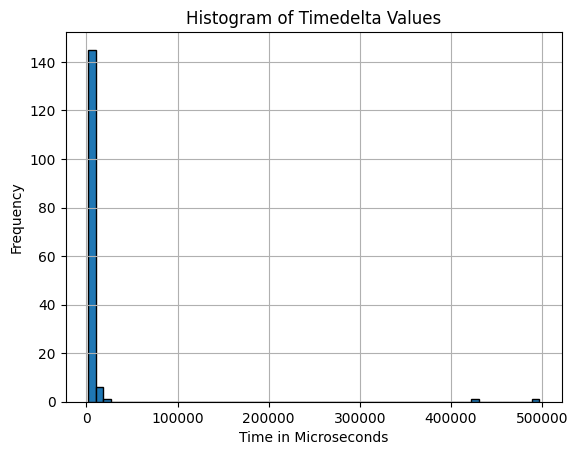

In [59]:
## Calculate the time delta between packets ingoing or outgoing for a specific device

device_address = '0x265e'

device_df = df[(df['Source Zigbee'] == device_address) | (df['Destination Zigbee'] == device_address)]
print(f"{len(device_df)} packets for device {device_address}")

device_df.sort_values(by=['Time'])
device_df.reset_index(inplace=True, drop=True)

date_string = device_df.loc[0,'Time']
date_format = "%b %d, %Y %H:%M:%S.%f"
date_object = datetime.strptime(date_string, date_format)

list_of_timedelta = []

for i in range(1, len(device_df)):
    date_string = device_df.loc[i,'Time']
    date_object1 = datetime.strptime(date_string, date_format)
    list_of_timedelta.append(date_object1 - date_object)
    date_object = date_object1

threshold = timedelta(days=0, hours=0, seconds=0, microseconds=500000)
second_threshold = timedelta(days=0)
filtered_timedelta_ledvance = [td for td in list_of_timedelta if td < threshold]
filtered_timedelta_ledvance = [td for td in filtered_timedelta_ledvance if td > second_threshold]
filtered_timedelta_micro_ledvance = [td.microseconds for td in filtered_timedelta_ledvance]

plt.hist(filtered_timedelta_micro_ledvance, bins=60, edgecolor='k')
plt.xlabel('Time in Microseconds')
plt.ylabel('Frequency')
plt.title('Histogram of Timedelta Values')
plt.grid(True)

hist, bin_edges = np.histogram(filtered_timedelta_micro_ledvance, bins=60)
cdf = np.cumsum(hist) / np.sum(hist)

percentile_bin = np.where(cdf > 0.95)[0][0]

percentile_value = bin_edges[percentile_bin + 1]
print(f"The 95th percentile value is {percentile_value} microseconds")

plt.show()

In [86]:
devices_hist_v2 = []

In [49]:
devices_hist_v4 = []

In [11]:
## Density plot based on inter arrival time
colormap = plt.cm.get_cmap('tab20', len(devices))

for device_address in devices:

    #device_df = df[(df['Source Zigbee'] == device_address) | (df['Destination Zigbee'] == device_address)]
    device_df = df[(df['Source Zigbee'] == device_address)]
    device_df = device_df.sort_values(by=['Time'])
    print(device_address)
    print(f"The dataframe is made up by {len(device_df)} packets")

    device_df.reset_index(inplace=True, drop=True)

    date_string = device_df.loc[0,'Time']
    date_format = "%b %d, %Y %H:%M:%S.%f"
    date_object = datetime.strptime(date_string, date_format)

    list_of_timedelta = []

    for i in range(1, len(device_df)):
        date_string = device_df.loc[i,'Time']
        date_object1 = datetime.strptime(date_string, date_format)
        list_of_timedelta.append(date_object1 - date_object)
        date_object = date_object1

    filtered_timedelta_device = [td for td in list_of_timedelta if td < timedelta(days=0, hours=0, seconds=0, microseconds=100000) and td > timedelta(days=0)]
    print(f"Filtered dataframe is made up by {len(filtered_timedelta_device)} packets")

    filtered_timedelta_micro_device = [(td.microseconds + 1000000 * td.seconds) * 60 / 6e4 for td in filtered_timedelta_device]
    if len(filtered_timedelta_micro_device) > 0:
        print(f"{max(filtered_timedelta_micro_device)} microseconds")


    #plt.hist(filtered_timedelta_micro_device, bins=100, edgecolor='k', color=colormap(devices.index(device_address)), label=device_address)
    sns.kdeplot(filtered_timedelta_micro_device, bw_method=0.1, label=device_address)
    plt.legend()
    plt.xlabel('Time in Milliseconds')
    plt.ylabel('Density')
    plt.title(f"Histogram of Timedelta Values")
    plt.grid(True)

    
    hist, bin_edges = np.histogram(filtered_timedelta_micro_device, bins=100, range=(0,100))
    #devices_hist_v2.append(hist)
    '''
    cdf = np.cumsum(hist) / np.sum(hist)

    percentile_bin = np.where(cdf > 0.95)[0][0]

    percentile_value = bin_edges[percentile_bin + 1]
    print(f"The 95th percentile value is {percentile_value} microseconds")
    '''
    print('')


plt.show()
save_tikzplotlib(plt.gcf(), "device_density.tex")


0x0000
The dataframe is made up by 65512 packets
Filtered dataframe is made up by 57820 packets
99.562 microseconds

0x4615
The dataframe is made up by 263 packets
Filtered dataframe is made up by 117 packets
30.147 microseconds

0x946e
The dataframe is made up by 72 packets
Filtered dataframe is made up by 5 packets
6.448 microseconds

0x7b10
The dataframe is made up by 61 packets
Filtered dataframe is made up by 6 packets
28.151 microseconds

0xd0bb
The dataframe is made up by 198 packets
Filtered dataframe is made up by 139 packets
83.109 microseconds

0x1f29
The dataframe is made up by 22 packets
Filtered dataframe is made up by 1 packets
5.391 microseconds

0x27d7
The dataframe is made up by 203 packets
Filtered dataframe is made up by 3 packets
12.768 microseconds

0x907b
The dataframe is made up by 55 packets
Filtered dataframe is made up by 1 packets
4.424 microseconds

0xe01d
The dataframe is made up by 283 packets
Filtered dataframe is made up by 196 packets
27.45 microsecond

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_4188\2623552381.py:35: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(filtered_timedelta_micro_device, bw_method=0.1, label=device_address)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_4188\2623552381.py:35: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(filtered_timedelta_micro_device, bw_method=0.1, label=device_address)



0x187a
The dataframe is made up by 117 packets
Filtered dataframe is made up by 61 packets
53.682 microseconds

0xc31c
The dataframe is made up by 404 packets
Filtered dataframe is made up by 279 packets
68.512 microseconds

0xe1a6
The dataframe is made up by 8834 packets
Filtered dataframe is made up by 5808 packets
99.924 microseconds

0x3d95
The dataframe is made up by 11311 packets
Filtered dataframe is made up by 8561 packets
99.372 microseconds

0xa706
The dataframe is made up by 9766 packets
Filtered dataframe is made up by 7843 packets
99.828 microseconds

0x4e11
The dataframe is made up by 2157 packets
Filtered dataframe is made up by 768 packets
96.94 microseconds

0x0112
The dataframe is made up by 1159 packets
Filtered dataframe is made up by 77 packets
91.897 microseconds

0xec7f
The dataframe is made up by 5248 packets
Filtered dataframe is made up by 3348 packets
99.068 microseconds

0x1e15
The dataframe is made up by 2693 packets
Filtered dataframe is made up by 1101 p

In [90]:
lev_distance_matrix_v2 = [[0 for x in range(len(devices_hist_v2))] for y in range(len(devices_hist_v2))]

for i in range(len(devices_hist_v2)):
    for j in range(len(devices_hist_v2)):
        lev_distance_matrix_v2[i][j] = lev.distance(str(devices_hist_v2[i]), str(devices_hist_v2[j]))
        

In [51]:
lev_distance_matrix_v4 = [[0 for x in range(len(devices_hist_v4))] for y in range(len(devices_hist_v4))]

for i in range(len(devices_hist_v4)):
    for j in range(len(devices_hist_v4)):
        lev_distance_matrix_v4[i][j] = lev.distance(str(devices_hist_v4[i]), str(devices_hist_v4[j]))
        

In [91]:
total_devices_hist = devices_hist_v2 + devices_hist_v4

lev_distance_matrix_total = np.zeros((len(total_devices_hist), len(total_devices_hist)), dtype=int)

for i in range(len(total_devices_hist)):
    for j in range(len(total_devices_hist)):
        lev_distance_matrix_total[i][j] = lev.distance(str(total_devices_hist[i]), str(total_devices_hist[j]))

In [92]:
sns.heatmap(lev_distance_matrix_v2, xticklabels=devices_name, yticklabels=devices_name, linewidths=0.5, cmap="crest", square=True)
plt.title('Levenshtein Distance Matrix for Acquisition 2')
plt.show()

In [59]:
sns.heatmap(lev_distance_matrix_v4, xticklabels=devices_name, yticklabels=devices_name)
plt.title('Levenshtein Distance Matrix for Acquisition 4')
plt.show()

In [89]:
devices_name_v2 = devices_name.copy()

In [80]:
devices_name_v4 = devices_name.copy()

In [101]:
sns.heatmap(lev_distance_matrix_total[0:22, 22:45], xticklabels=devices_name_v4, yticklabels=devices_name_v2, linewidths=0.5, cmap="crest", square=True)
plt.title('Levenshtein Distance Matrix in between Acquisition 2 and 4')
save_tikzplotlib(plt.gcf(), "levenshtein_between_acquisition.tex")

In [13]:
# Density plot based on inter arrival time grouping by type of devices

df['Device Type'] = df['Source Zigbee'].map(device_type_mapping)

# Density plot based on inter-arrival time for each category
colormap = plt.cm.get_cmap('tab20', len(df['Device Type'].unique()))

for device_type, color in zip(df['Device Type'].unique(), colormap.colors):
    subset_df = df[df['Device Type'] == device_type]

    all_timedelta_micro_device = []

    for device_address in subset_df['Source Zigbee'].unique():
        device_df = subset_df[subset_df['Source Zigbee'] == device_address]
        device_df.reset_index(inplace=True, drop=True)

        list_of_timedelta = []
        for i in range(1, len(device_df)):
            date_string = device_df.loc[i, 'Time']
            date_object1 = datetime.strptime(date_string, "%b %d, %Y %H:%M:%S.%f")
            list_of_timedelta.append(date_object1 - datetime.strptime(device_df.loc[i-1, 'Time'], "%b %d, %Y %H:%M:%S.%f"))

        filtered_timedelta_device = [td for td in list_of_timedelta if td < timedelta(days=0, hours=0, seconds=25, microseconds=0) and td > timedelta(days=0)]

        filtered_timedelta_micro_device = [(td.microseconds + 1000000 * td.seconds) * 60 / 6e4 for td in filtered_timedelta_device]

        all_timedelta_micro_device.extend(filtered_timedelta_micro_device)

    sns.kdeplot(all_timedelta_micro_device, bw_method=0.1, label=device_type, color=color)

plt.legend()
plt.xlabel('Time in Milliseconds')
plt.ylabel('Density')
plt.title('Density for Category of Devices')
plt.grid(True)
#save_tikzplotlib(plt.gcf(), "category_density_updated.tex")
plt.show()

In [119]:
# Density function for specific device

device_address = '0x0a79'

device_df = df[(df['Source Zigbee'] == device_address)]
device_df = device_df.sort_values(by=['Time'])
print(device_address)
print(f"The dataframe is made up by {len(device_df)} packets")

device_df.reset_index(inplace=True, drop=True)

date_string = device_df.loc[0,'Time']
date_format = "%b %d, %Y %H:%M:%S.%f"
date_object = datetime.strptime(date_string, date_format)

list_of_timedelta = []

for i in range(1, len(device_df)):
    date_string = device_df.loc[i,'Time']
    date_object1 = datetime.strptime(date_string, date_format)
    list_of_timedelta.append(date_object1 - date_object)
    date_object = date_object1

filtered_timedelta_device = [td for td in list_of_timedelta if td < timedelta(days=0, hours=0, seconds=20, microseconds=0) and td > timedelta(days=0)]
print(f"Filtered dataframe is made up by {len(filtered_timedelta_device)} packets")

filtered_timedelta_micro_device = [(td.microseconds + 1000000 * td.seconds) / 1e6 for td in filtered_timedelta_device]
if len(filtered_timedelta_micro_device) > 0:
    print(f"{max(filtered_timedelta_micro_device)} seconds")


#plt.hist(filtered_timedelta_micro_device, bins=100, edgecolor='k', color=colormap(devices.index(device_address)), label=device_address)
sns.kdeplot(filtered_timedelta_micro_device, bw_method=0.1, label=device_address)
plt.legend()
plt.xlabel('Time in Seconds')
plt.ylabel('Density')
plt.title(f"Histogram of Timedelta Values")
plt.grid(True)

hist, bin_edges = np.histogram(filtered_timedelta_micro_device, bins=100, range=(0, 20))

plt.show()

0x0a79
The dataframe is made up by 75 packets
Filtered dataframe is made up by 56 packets
8.6792 seconds


In [8]:
## Calculating mean and standard deviation from the total dataframe
inter_arrival_time = []
df = df.sort_values(by=['Time'])

date_string = df.loc[0,'Time']
date_format = "%b %d, %Y %H:%M:%S.%f"
date_object = datetime.strptime(date_string, date_format)

for i in range(1, len(df)):
    date_string = df.loc[i,'Time']
    date_object1 = datetime.strptime(date_string, date_format)
    iat = date_object1 - date_object
    if(iat > timedelta(days=0, hours=0, seconds=0, microseconds=0) and
       iat < timedelta(days=0, hours=0, seconds=0, microseconds=150000)):
        inter_arrival_time.append(iat)
    date_object = date_object1


In [9]:
iat_mean = np.mean(inter_arrival_time)

micro_iat = np.array([td.total_seconds() for td in inter_arrival_time])
iat_stdev = np.std(micro_iat)

print(f"Mean is {iat_mean}")
print(f"Standard deviation is {iat_stdev} seconds")

iat_threshold = iat_mean.total_seconds() + 3 * iat_stdev
print(f"Threshold is {iat_threshold} seconds")

Mean is 0:00:00.009653
Standard deviation is 0.017931314585409763 seconds
Threshold is 0.06344694375622928 seconds


In [91]:
## Calculate the time delta between packets from a specific device grouped by destination zigbee

device_address = '0x310d'

device_flux_df = df[(df['Source Zigbee'] == device_address) | (df['Destination Zigbee'] == device_address)]
device_flux_df = device_flux_df.sort_values(by=['Time'])
print(f"The dataframe for device {device_address} is made up by {len(device_flux_df)} packets")

device_flux_df.reset_index(inplace=True, drop=True)

#group by destination zigbee
device_flux_df = device_flux_df.groupby('Destination Zigbee')

legend_labels = []

for destination_address, group_data in device_flux_df:
    #if destination_address != device_address:
    group = device_flux_df.get_group(destination_address)
    group.reset_index(inplace=True, drop=True)

    date_string = group.loc[0,'Time']
    date_string_without_zeros1 = date_string[:-3]
    date_format = "%b %d, %Y %H:%M:%S.%f"
    date_object = datetime.strptime(date_string_without_zeros1, date_format)

    list_of_timedelta = []

    for i in range(1, len(group)):
        date_string = group.loc[i,'Time']
        date_string_without_zeros = date_string[:-3]
        date_object1 = datetime.strptime(date_string_without_zeros, date_format)
        list_of_timedelta.append(date_object1 - date_object)
        date_object = date_object1

    threshold = timedelta(days=0, hours=0, seconds=0, microseconds=100000)
    filtered = [td for td in list_of_timedelta if td < threshold]
    list_micro = [td.microseconds + 1000000 * td.seconds for td in filtered]

    if len(list_micro) > 1:
        mean = np.mean(list_micro)
        std = np.std(list_micro)

        print(f"Mean for destination {destination_address} is: {mean}")
        print(f"Standard deviation for destination {destination_address} is: {std}")
        print("Calculated on {} packets".format(len(list_micro)))
        print("")
        legend_labels.append(destination_address)
        plt.hist(list_micro, bins=100, edgecolor='k', alpha=0.7, label=destination_address)
    
    plt.legend(legend_labels, title='Destination Address')
    plt.xlabel('Time in Microseconds')
    plt.ylabel('Frequency')
    plt.title('Histogram of Timedelta Values')
    plt.grid(True)
    plt.show()

The dataframe for device 0x310d is made up by 1556 packets
Mean for destination 0x310d is: 20560.118644067796
Standard deviation for destination 0x310d is: 16526.639129542553
Calculated on 118 packets

Mean for destination 0xdad3 is: 42074.00785340314
Standard deviation for destination 0xdad3 is: 18569.91180463374
Calculated on 382 packets

Mean for destination 0xfffc is: 28928.1
Standard deviation for destination 0xfffc is: 17814.126663690255
Calculated on 20 packets

Mean for destination 0xfffd is: 20441.0
Standard deviation for destination 0xfffd is: 19107.584323159917
Calculated on 3 packets



In [34]:
## Calculate the time delta between a flux of two specific devices

device_address = '0x0000'

device_packets = df[(df['Source Zigbee'] == device_address) | (df['Destination Zigbee'] == device_address)]
device_packets = device_packets.sort_values(by=['Time'])
device_packets.reset_index(inplace=True, drop=True)

communicating_device = device_packets['Destination Zigbee'].unique()
mask = communicating_device != device_address
communicating_device = communicating_device[mask]

In [5]:
print(communicating_device)

['0xfffc' '0x5850' '0xfffd' '0xaea8' '0xee9c' '0x43f8' '0xb6ee' '0x234c'
 '0x8efb' '0x8051' '0x9c97' '0xdd18' '0x8c99' '0xa8d4' '0x235e' '0xff91'
 '0x4aee' '0xa7f2']


In [93]:
other_device = '0xaea8'

In [94]:
communication = device_packets[(device_packets['Destination Zigbee'] == other_device) | (device_packets['Source Zigbee'] == other_device)]
communication.reset_index(inplace=True, drop=True)

In [95]:
date_string = communication.loc[0,'Time']
date_string_without_zeros1 = date_string[:-3]
date_format = "%b %d, %Y %H:%M:%S.%f"
date_object = datetime.strptime(date_string_without_zeros1, date_format)

list_of_timedelta = []

for i in range(1, len(communication)):
    date_string = communication.loc[i,'Time']
    date_string_without_zeros = date_string[:-3]
    date_object1 = datetime.strptime(date_string_without_zeros, date_format)
    list_of_timedelta.append(date_object1 - date_object)
    date_object = date_object1

In [9]:
print(list_of_timedelta)

[datetime.timedelta(microseconds=185840), datetime.timedelta(microseconds=44852), datetime.timedelta(microseconds=97555), datetime.timedelta(microseconds=25750), datetime.timedelta(microseconds=37771), datetime.timedelta(microseconds=23555), datetime.timedelta(microseconds=40619), datetime.timedelta(microseconds=36070), datetime.timedelta(microseconds=30634), datetime.timedelta(microseconds=26514), datetime.timedelta(microseconds=69152), datetime.timedelta(microseconds=98850), datetime.timedelta(microseconds=22156), datetime.timedelta(microseconds=79697), datetime.timedelta(microseconds=18578), datetime.timedelta(microseconds=10987), datetime.timedelta(microseconds=10491), datetime.timedelta(microseconds=69168), datetime.timedelta(microseconds=24580), datetime.timedelta(microseconds=25553), datetime.timedelta(microseconds=145767), datetime.timedelta(microseconds=112038), datetime.timedelta(microseconds=7027), datetime.timedelta(microseconds=17764), datetime.timedelta(microseconds=7874)

In [96]:
min_threshold = timedelta(days=0, hours=0, seconds=0, microseconds=0)
max_threshold = timedelta(days=0, hours=0, seconds=0, microseconds=50000)
filtered = [td for td in list_of_timedelta if td > min_threshold]
filtered = [td for td in filtered if td < max_threshold]
list_micro = [td.microseconds + 1000000 * td.seconds for td in filtered]

In [97]:
legend_labels = []

if len(list_micro) > 1:
    mean = np.mean(list_micro)
    std = np.std(list_micro)

    print(f"Mean for destination {other_device} is: {mean}")
    print(f"Standard deviation for destination {other_device} is: {std}")
    print("Calculated on {} packets".format(len(list_micro)))
    print("")

plt.hist(list_micro, bins=500, edgecolor='k')
legend_labels.append(other_device)
plt.legend(legend_labels, title='Device in Communication')
plt.xlabel('Time in Microseconds')
plt.ylabel('Frequency')
plt.title('Histogram of Timedelta Values for device {}'.format(device_address))
plt.grid(True)
plt.show()

Mean for destination 0xaea8 is: 9692.79831932773
Standard deviation for destination 0xaea8 is: 8129.9480070896125
Calculated on 119 packets



In [5]:
## Divide the dataframe into trains of packets according to the threshold

# for each device i will have a list of list: a list of trains and each train is a list of packets
# there will be the same train for both the devices in communication
# from the packets in the train i will extract the features (delta time, packet length, packet type, payload, fcf, ecc)

train_of_packets = []
all_trains = []

In [8]:
for device_address in devices:

    device_packets = df[(df['Source Zigbee'] == device_address) | (df['Destination Zigbee'] == device_address)]
    device_packets = device_packets.sort_values(by=['Time'])
    device_packets = device_packets[['Time', 'Length', 'FCF IEEE', 'Sequence Number', 'Source Zigbee', 'Destination Zigbee', 'Payload Length']]
    device_packets.reset_index(inplace=True, drop=True)

    prev_timestamp = None
    for index, row in device_packets.iterrows():
        date_string = row['Time']
        date_format = "%b %d, %Y %H:%M:%S.%f"
        timestamp = datetime.strptime(date_string, date_format)
        if prev_timestamp is not None:
            delta_time = timestamp - prev_timestamp
            if delta_time < threshold:
                train_of_packets.append(row)
            else:
                if len(train_of_packets) >= 2:
                    all_trains.append(train_of_packets)
                train_of_packets = [row]

        prev_timestamp = timestamp

    if len(train_of_packets) >= 2:
        all_trains.append(train_of_packets)

    trains = pd.DataFrame(all_trains)

    trains.to_csv(f'trains_{device_address}.csv', index=False)

    del all_trains

    train_of_packets = []
    all_trains = []

In [ ]:
for i in range(len(bin_edges) - 1):
    print(f"Bin {i + 1}: {bin_edges[i]:.2f} to {bin_edges[i + 1]:.2f} --> Count: {int(hist[i])}")

In [8]:
### Possible MAC addresses for each device

mac_addresses = df.groupby('Source Zigbee')['Extended Source'].unique().reset_index()

for source, extended in zip(mac_addresses['Source Zigbee'], mac_addresses['Extended Source']):
    if source not in devices:
        mac_addresses.drop(mac_addresses[mac_addresses['Source Zigbee'] == source].index, inplace=True)
    else:
        mac_addresses.loc[mac_addresses['Source Zigbee'] == source, 'Source Zigbee'] = device_name_mapping[source]

In [19]:
### ---------------------------------------- RANDOM FOREST ON DENSITY FUNCTION ---------------------------------------- ###

## Matrix composed by the hystograms of the time delta between packets for each device removing acks and link status

number_of_features = 100
total_matrix = np.empty((0, number_of_features + 1), int)

train_of_packets = []


for device_address in devices:

    
    # CREATE THE TRAINS OF PACKETS
    all_trains = []
    
    device_packets = df[(df['Source Zigbee'] == device_address) | (df['Destination Zigbee'] == device_address)]
    device_packets = device_packets.sort_values(by=['Time'])
    device_packets = device_packets[['Time', 'Delta Time', 'Length', 'FCF IEEE', 'Sequence Number', 'Source Zigbee', 'Destination Zigbee', 'Payload Length']]
    device_packets.reset_index(inplace=True, drop=True)

    prev_timestamp = None
    for index, row in device_packets.iterrows():
        date_string = row['Time']
        date_format = "%b %d, %Y %H:%M:%S.%f"
        timestamp = datetime.strptime(date_string, date_format)
        if prev_timestamp is not None:
            delta_time = timestamp - prev_timestamp
            if delta_time < threshold:
                train_of_packets.append(row)
            else:
                if len(train_of_packets) >= 2 and train_of_packets[0]['Source Zigbee'] == device_address:
                    all_trains.append(train_of_packets)
                train_of_packets = [row]

        prev_timestamp = timestamp

    if len(train_of_packets) >= 2:
        all_trains.append(train_of_packets)

    trains = pd.DataFrame(all_trains)

    del all_trains

    # REMOVE DUPLICATES
    cleaned_df = []
    for i in range(len(trains)):
        train = trains.loc[i]
        seen_packets = set()
        result = []
        for packet in train:
            if packet is not None:
                packet_tuple = (
                    packet['Length'],
                    packet['FCF IEEE'],
                    packet['Sequence Number'],
                    packet['Source Zigbee'],
                    packet['Destination Zigbee'],
                    packet['Payload Length']
                )
                if packet_tuple not in seen_packets:
                    seen_packets.add(packet_tuple)
                    result.append(packet)
        cleaned_df.append(result)

    cleaned_df = pd.DataFrame(cleaned_df)

    # REMOVE ACK PACKETS AND LINK STATUS
    no_ack_df = []
    for i in range(len(cleaned_df)):
        train = cleaned_df.loc[i]
        result = []
        for packet in train:
            if packet is not None and packet['FCF IEEE'] != "0x0002" and packet['FCF IEEE'] != "0x8841":
                result.append(packet)
        no_ack_df.append(result)

    no_ack_df = pd.DataFrame(no_ack_df)

    # CREATE THE HISTOGRAMS
    histograms = []
    for i in range(len(no_ack_df)):
        train = no_ack_df.loc[i]
        list_of_timedelta = []
        for j in range(1, len(train)):
            if train[j] is not None:
                date_string = train[j]['Time']
                date_format = "%b %d, %Y %H:%M:%S.%f"
                date_object = datetime.strptime(date_string, date_format)
                date_string1 = train[j-1]['Time']
                date_object1 = datetime.strptime(date_string1, date_format)
                list_of_timedelta.append(date_object - date_object1)
        list_of_timedelta_micro = [td.microseconds for td in list_of_timedelta]
        hist, bin_edges = np.histogram(list_of_timedelta_micro, bins=number_of_features, range=(0, threshold.microseconds))
        histograms.append(hist)

    # CREATE THE MATRIX WITH THE DEVICE ADDRESS
    histogram_matrix = np.array(histograms)
    last_column = np.repeat(device_address, len(histogram_matrix))
    matrix_with_device = np.column_stack((histogram_matrix, last_column))

    # APPEND THE MATRIX TO THE TOTAL MATRIX
    total_matrix = np.append(total_matrix, matrix_with_device, axis=0)


In [21]:
## Random Forest Classifier on the total matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = total_matrix[:, :-1]
y = total_matrix[:, -1]

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

max_depths = range(15, 25)
f1_scores = []
accuracies = []

for max_depth in max_depths:
    clf = RandomForestClassifier(n_estimators=100, max_depth=max_depth)
    f1score = []
    accuracy = []
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index] 
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        #f1score.append(f1_score(y_test, y_pred, average='macro'))
        accuracy.append(accuracy_score(y_test, y_pred))
    #f1_scores.append(np.mean(f1score))
    accuracies.append(np.mean(accuracy))

plt.plot(max_depths, accuracies)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.show()



In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = total_matrix[:, :-1]
y = total_matrix[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=21)

# Train the RandomForestClassifier
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier on the testing data
print('Features Importance')
print(clf.feature_importances_)
print('')
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro') 
class_prob = clf.predict_proba(X_test)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Features Importance
[3.40042191e-05 2.45424453e-02 1.58396050e-01 6.92340419e-02
 2.79822534e-02 2.66902880e-02 3.05901068e-02 2.24412156e-02
 1.93834371e-02 1.95460758e-02 3.09138621e-02 1.69833519e-02
 4.18955501e-02 1.98013184e-02 1.95862642e-02 1.76214795e-02
 1.63474087e-02 2.00389180e-02 3.15007982e-02 2.43355362e-02
 2.24764451e-02 2.53959614e-02 5.75471975e-02 1.20954735e-01
 3.52994887e-02 1.82149275e-02 1.82661793e-02 2.15334473e-02
 2.23440370e-02 2.01031764e-02]

Accuracy: 0.6207792207792208
Precision: 0.47563057804999315
Recall: 0.37357174437652724
F1: 0.38149879391019287


In [12]:
## Matrix composed by the hystograms of the time delta between outgoing packets for each device removing acks and link status

number_of_features = 100
total_matrix = np.empty((0, number_of_features + 1), int)

train_of_packets = []


for device_address in devices:
    
    # CREATE THE TRAINS OF PACKETS
    all_trains = []
    
    device_packets = df[(df['Source Zigbee'] == device_address)]
    device_packets = device_packets.sort_values(by=['Time'])
    device_packets = device_packets[['Time', 'Length', 'FCF IEEE', 'Sequence Number', 'Source Zigbee', 'Destination Zigbee', 'Payload Length']]
    device_packets.reset_index(inplace=True, drop=True)

    prev_timestamp = None
    for index, row in device_packets.iterrows():
        date_string = row['Time']
        date_format = "%b %d, %Y %H:%M:%S.%f"
        timestamp = datetime.strptime(date_string, date_format)
        if prev_timestamp is not None:
            delta_time = timestamp - prev_timestamp
            if delta_time < threshold:
                train_of_packets.append(row)
            else:
                if len(train_of_packets) >= 2 or device_address == '0x907b':
                    all_trains.append(train_of_packets)
                train_of_packets = [row]

        prev_timestamp = timestamp

    if len(train_of_packets) >= 2:
        all_trains.append(train_of_packets)

    trains = pd.DataFrame(all_trains)

    del all_trains

    # REMOVE DUPLICATES
    cleaned_df = []
    for i in range(len(trains)):
        train = trains.loc[i]
        seen_packets = set()
        result = []
        for packet in train:
            if packet is not None:
                packet_tuple = (
                    packet['Length'],
                    packet['FCF IEEE'],
                    packet['Sequence Number'],
                    packet['Source Zigbee'],
                    packet['Destination Zigbee'],
                    packet['Payload Length']
                )
                if packet_tuple not in seen_packets:
                    seen_packets.add(packet_tuple)
                    result.append(packet)
        cleaned_df.append(result)

    cleaned_df = pd.DataFrame(cleaned_df)

    # REMOVE ACK PACKETS AND LINK STATUS
    no_ack_df = []
    for i in range(len(cleaned_df)):
        train = cleaned_df.loc[i]
        result = []
        for packet in train:
            if packet is not None and packet['FCF IEEE'] != "0x0002" and packet['FCF IEEE'] != "0x8841":
                result.append(packet)
        no_ack_df.append(result)

    no_ack_df = pd.DataFrame(no_ack_df)

    # CREATE THE HISTOGRAMS
    histograms = []
    for i in range(len(no_ack_df)):
        train = no_ack_df.loc[i]
        list_of_timedelta = []
        for j in range(1, len(train)):
            if train[j] is not None:
                date_string = train[j]['Time']
                date_format = "%b %d, %Y %H:%M:%S.%f"
                date_object = datetime.strptime(date_string, date_format)
                date_string1 = train[j-1]['Time']
                date_object1 = datetime.strptime(date_string1, date_format)
                list_of_timedelta.append(date_object - date_object1)
        list_of_timedelta_micro = [td.microseconds for td in list_of_timedelta]
        hist, bin_edges = np.histogram(list_of_timedelta_micro, bins=number_of_features, range=(0, threshold.microseconds))
        histograms.append(hist)

    # CREATE THE MATRIX WITH THE DEVICE ADDRESS
    histogram_matrix = np.array(histograms)
    last_column = np.repeat(device_address, len(histogram_matrix))
    matrix_with_device = np.column_stack((histogram_matrix, last_column))

    # APPEND THE MATRIX TO THE TOTAL MATRIX
    total_matrix = np.append(total_matrix, matrix_with_device, axis=0)


In [17]:
## Matrix composed by the hystograms of the time delta between outgoing packets for each type of device removing acks and link status

number_of_features = 30
total_matrix = np.empty((0, number_of_features + 1), int)

train_of_packets = []


for device_address in devices:
    
    # CREATE THE TRAINS OF PACKETS
    all_trains = []
    
    device_packets = df[(df['Source Zigbee'] == device_address)]
    device_packets = device_packets.sort_values(by=['Time'])
    device_packets = device_packets[['Time', 'Length', 'FCF IEEE', 'Sequence Number', 'Source Zigbee', 'Destination Zigbee', 'Payload Length']]
    device_packets.reset_index(inplace=True, drop=True)

    prev_timestamp = None
    for index, row in device_packets.iterrows():
        date_string = row['Time']
        date_format = "%b %d, %Y %H:%M:%S.%f"
        timestamp = datetime.strptime(date_string, date_format)
        if prev_timestamp is not None:
            delta_time = timestamp - prev_timestamp
            if delta_time < threshold:
                train_of_packets.append(row)
            else:
                if len(train_of_packets) >= 2 or device_address == '0x907b':
                    all_trains.append(train_of_packets)
                train_of_packets = [row]

        prev_timestamp = timestamp

    if len(train_of_packets) >= 2:
        all_trains.append(train_of_packets)

    trains = pd.DataFrame(all_trains)

    del all_trains

    # REMOVE DUPLICATES
    cleaned_df = []
    for i in range(len(trains)):
        train = trains.loc[i]
        seen_packets = set()
        result = []
        for packet in train:
            if packet is not None:
                packet_tuple = (
                    packet['Length'],
                    packet['FCF IEEE'],
                    packet['Sequence Number'],
                    packet['Source Zigbee'],
                    packet['Destination Zigbee'],
                    packet['Payload Length']
                )
                if packet_tuple not in seen_packets:
                    seen_packets.add(packet_tuple)
                    result.append(packet)
        cleaned_df.append(result)

    cleaned_df = pd.DataFrame(cleaned_df)

    # REMOVE ACK PACKETS AND LINK STATUS
    no_ack_df = []
    for i in range(len(cleaned_df)):
        train = cleaned_df.loc[i]
        result = []
        for packet in train:
            if packet is not None and packet['FCF IEEE'] != "0x0002" and packet['FCF IEEE'] != "0x8841":
                result.append(packet)
        no_ack_df.append(result)

    no_ack_df = pd.DataFrame(no_ack_df)

    # CREATE THE HISTOGRAMS
    histograms = []
    for i in range(len(no_ack_df)):
        train = no_ack_df.loc[i]
        list_of_timedelta = []
        for j in range(1, len(train)):
            if train[j] is not None:
                date_string = train[j]['Time']
                date_format = "%b %d, %Y %H:%M:%S.%f"
                date_object = datetime.strptime(date_string, date_format)
                date_string1 = train[j-1]['Time']
                date_object1 = datetime.strptime(date_string1, date_format)
                list_of_timedelta.append(date_object - date_object1)
        list_of_timedelta_micro = [td.microseconds for td in list_of_timedelta]
        hist, bin_edges = np.histogram(list_of_timedelta_micro, bins=number_of_features, range=(0, threshold.microseconds))
        histograms.append(hist)

    # CREATE THE MATRIX WITH THE DEVICE ADDRESS
    histogram_matrix = np.array(histograms)
    last_column = np.repeat(device_type_mapping[device_address], len(histogram_matrix))
    matrix_with_device = np.column_stack((histogram_matrix, last_column))

    # APPEND THE MATRIX TO THE TOTAL MATRIX
    total_matrix = np.append(total_matrix, matrix_with_device, axis=0)


In [9]:
total_matrix

array([['0', '0', '0', ..., '0', '0', 'Coordinator'],
       ['0', '0', '0', ..., '0', '0', 'Coordinator'],
       ['0', '0', '0', ..., '0', '0', 'Coordinator'],
       ...,
       ['0', '0', '0', ..., '0', '0', 'Motion'],
       ['0', '0', '0', ..., '0', '0', 'Motion'],
       ['0', '0', '0', ..., '0', '0', 'Motion']], dtype='<U21')

In [11]:
### -------------------------------------------------- TSFRESH -------------------------------------------------- ###

# Dataframe with train of packets without acks and link status

train_of_packets = []
no_ack_df = []

for device_address in devices:
    
    # CREATE THE TRAINS OF PACKETS
    all_trains = []
    
    device_packets = df[(df['Source Zigbee'] == device_address) | (df['Destination Zigbee'] == device_address)]
    device_packets = device_packets.sort_values(by=['Time'])
    device_packets = device_packets[['Time', 'Delta Time', 'Length', 'FCF IEEE', 'Sequence Number', 'Source Zigbee', 'Destination Zigbee', 'Payload Length']]
    device_packets.reset_index(inplace=True, drop=True)

    prev_timestamp = None
    for index, row in device_packets.iterrows():
        date_string = row['Time']
        date_format = "%b %d, %Y %H:%M:%S.%f"
        timestamp = datetime.strptime(date_string, date_format)
        if prev_timestamp is not None:
            delta_time = timestamp - prev_timestamp
            if delta_time < threshold:
                train_of_packets.append(row)
            else:
                if len(train_of_packets) >= 2:
                    all_trains.append(train_of_packets)
                train_of_packets = [row]

        prev_timestamp = timestamp

    if len(train_of_packets) >= 2:
        all_trains.append(train_of_packets)

    trains = pd.DataFrame(all_trains)

    del all_trains

    # REMOVE DUPLICATES
    cleaned_df = []
    for i in range(len(trains)):
        train = trains.loc[i]
        seen_packets = set()
        result = []
        for packet in train:
            if packet is not None:
                packet_tuple = (
                    packet['Length'],
                    packet['FCF IEEE'],
                    packet['Sequence Number'],
                    packet['Source Zigbee'],
                    packet['Destination Zigbee'],
                    packet['Payload Length']
                )
                if packet_tuple not in seen_packets:
                    seen_packets.add(packet_tuple)
                    result.append(packet)
        cleaned_df.append(result)

    cleaned_df = pd.DataFrame(cleaned_df)

    # REMOVE ACK PACKETS AND LINK STATUS
    for i in range(len(cleaned_df)):
        train = cleaned_df.loc[i]
        result = []
        for packet in train:
            if packet is not None and packet['FCF IEEE'] != "0x0002" and packet['FCF IEEE'] != "0x8841":
                result.append(packet)
        if(len(result) > 0 and result[0]['Source Zigbee'] in devices):
            no_ack_df.append(result)

no_ack_df = pd.DataFrame(no_ack_df)


In [30]:
# Create a single DataFrame with all the packets and 'id' column to identify the train of packets

all_packets = list()

for i in range(len(no_ack_df)):
    train = no_ack_df.loc[i]
    for packet in train:
        if packet is not None:
            all_packets.append({
                    'id': i,
                    'Time': packet['Time'],
                    'Delta Time': packet['Delta Time'],
                    'Length': packet['Length'],
                    'Sequence Number': packet['Sequence Number'],
                    'Payload Length': packet['Payload Length'] if not np.isnan(packet['Payload Length']) else 0})

result_df = pd.DataFrame(all_packets)

# Set Delta Time of the first packet of each train to 0
id_changes = result_df['id'] != result_df['id'].shift(1)
result_df.loc[id_changes, 'Delta Time'] = 0

In [31]:
## Tsfresh used to get features from trains of packets

from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import MinimalFCParameters, EfficientFCParameters, ComprehensiveFCParameters

result_df['Time'] = pd.to_datetime(result_df['Time'], format="%b %d, %Y %H:%M:%S.%f")

# Extract features from the dataframe
extracted_features = extract_features(result_df, column_id="id", column_sort="Time", default_fc_parameters=MinimalFCParameters())

# Impute the extracted features
impute(extracted_features)

Feature Extraction: 100%|██████████| 20/20 [00:12<00:00,  1.55it/s]


,Delta Time__sum_values,Delta Time__median,Delta Time__mean,Delta Time__length,Delta Time__standard_deviation,Delta Time__variance,Delta Time__root_mean_square,Delta Time__maximum,Delta Time__absolute_maximum,Delta Time__minimum,...,Payload Length__sum_values,Payload Length__median,Payload Length__mean,Payload Length__length,Payload Length__standard_deviation,Payload Length__variance,Payload Length__root_mean_square,Payload Length__maximum,Payload Length__absolute_maximum,Payload Length__minimum
0,0.167012,0.003516,0.004514,37.0,0.003564,0.000013,0.005751,0.020430,0.020430,0.0,...,601.0,15.0,16.243243,37.0,8.191642,67.102995,18.191920,29.0,29.0,8.0
1,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,20.0,20.0,20.000000,1.0,0.000000,0.000000,20.000000,20.0,20.0,20.0
2,0.047747,0.004154,0.011937,4.0,0.015985,0.000256,0.019950,0.039440,0.039440,0.0,...,57.0,13.0,14.250000,4.0,5.448624,29.687500,15.256146,23.0,23.0,8.0
3,0.003718,0.001859,0.001859,2.0,0.001859,0.000003,0.002629,0.003718,0.003718,0.0,...,30.0,15.0,15.000000,2.0,0.000000,0.000000,15.000000,15.0,15.0,15.0
4,0.148752,0.003197,0.012396,12.0,0.016969,0.000288,0.021014,0.043720,0.043720,0.0,...,128.0,13.0,10.666667,12.0,5.587685,31.222222,12.041595,16.0,16.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11535,0.055490,0.005274,0.013873,4.0,0.018129,0.000329,0.022828,0.044942,0.044942,0.0,...,33.0,8.0,8.250000,4.0,3.191786,10.187500,8.845903,13.0,13.0,4.0
11536,0.090317,0.023174,0.022579,4.0,0.021197,0.000449,0.030970,0.043969,0.043969,0.0,...,49.0,14.5,12.250000,4.0,4.918079,24.187500,13.200379,16.0,16.0,4.0
11537,0.054316,0.006048,0.013579,4.0,0.016765,0.000281,0.021574,0.042220,0.042220,0.0,...,33.0,8.0,8.250000,4.0,3.191786,10.187500,8.845903,13.0,13.0,4.0
11538,0.088105,0.022710,0.022026,4.0,0.019803,0.000392,0.029619,0.042685,0.042685,0.0,...,49.0,14.5,12.250000,4.0,4.918079,24.187500,13.200379,16.0,16.0,4.0


In [32]:
# Add the device address to the dataframe of features to be able to classify the packets
for i in range(len(no_ack_df)):
    extracted_features.loc[i, 'Source Zigbee'] = no_ack_df.loc[i].loc[0].loc['Source Zigbee']

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_30504\695883331.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0x0000' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  extracted_features.loc[i, 'Source Zigbee'] = no_ack_df.loc[i].loc[0].loc['Source Zigbee']


In [18]:
# Adding to every row of extracted_features the number of packets that fall inside the windows of threshold / 10

N = 10
for i in range(len(extracted_features)):
    mu = extracted_features.loc[i, 'Delta Time__mean']
    sigma = extracted_features.loc[i, 'Delta Time__standard_deviation']
    deltas = result_df[result_df['id'] == i]['Delta Time']
    for n in range(N):
        lower_bound = n * (threshold_float / N)
        upper_bound = (n + 1) * (threshold_float / N)
        count = ((deltas >= lower_bound) & 
                 (deltas < upper_bound)).sum()

        # Add the count to the extracted features
        match n:
            case 0:
                extracted_features.loc[i, 'Window 1'] = count
            case 1:
                extracted_features.loc[i, 'Window 2'] = count
            case 2:
                extracted_features.loc[i, 'Window 3'] = count
            case 3:
                extracted_features.loc[i, 'Window 4'] = count
            case 4:
                extracted_features.loc[i, 'Window 5'] = count
            case 5:
                extracted_features.loc[i, 'Window 6'] = count
            case 6:
                extracted_features.loc[i, 'Window 7'] = count
            case 7:
                extracted_features.loc[i, 'Window 8'] = count
            case 8:
                extracted_features.loc[i, 'Window 9'] = count
            case 9:
                extracted_features.loc[i, 'Window 10'] = count
            case _:
                print('Error')

In [33]:
# RandomForest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X = extracted_features.drop(columns=['Source Zigbee'])
y = extracted_features['Source Zigbee']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the RandomForestClassifier
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier on the testing data
print('Features Importance')
print(clf.feature_importances_)
print('')
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro') 
class_prob = clf.predict_proba(X_test)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

#plot_confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=devices)
disp.plot(ax=plt.gca(), xticks_rotation='vertical', cmap='Blues')
plt.show()
#plt.figure(figsize=(10, 10))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.title('Confusion Matrix')
#plt.show()

Features Importance
[0.02247343 0.02680003 0.01992913 0.0180898  0.01706135 0.0145956
 0.0150438  0.01398007 0.01465781 0.         0.04059003 0.03206346
 0.03791706 0.02506873 0.02681109 0.03207034 0.02898303 0.02430443
 0.027993   0.02516921 0.02271885 0.02376349 0.02192168 0.01903098
 0.0125036  0.01256422 0.02269006 0.02186821 0.02250771 0.02284664
 0.05209958 0.03345297 0.03717864 0.01997796 0.02932026 0.02421812
 0.02727415 0.042688   0.0446327  0.0231408 ]

Accuracy: 0.9371750433275563
Precision: 0.8779931980084598
Recall: 0.8195579746900873
F1: 0.8360780558891586


In [34]:
y.value_counts()

Source Zigbee
0x0000    6090
0xe1a6    1175
0x3d95     970
0xec7f     503
0xa706     501
0x059b     417
0x1cd8     297
0x27d7     243
0xc31c     222
0x711c     175
0xe01d     163
0x5bb9     155
0x4615     148
0x0112     106
0x4e11      84
0x946e      81
0x907b      58
0x187a      43
0x7b10      41
0x1e15      28
0xd0bb      26
0x045b      14
Name: count, dtype: int64

In [35]:
# Random Forest Classifier with 10-fold cross validation

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X = extracted_features.drop(columns=['Source Zigbee'])
y = extracted_features['Source Zigbee']

# Instantiate the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create StratifiedKFold object with 10 folds
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform 10-fold cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the RandomForestClassifier
    clf.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = clf.predict(X_test)

    # Calculate and store metrics for each fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

# Print average metrics across all folds
print("Average Metrics Across Folds:")
print(f"Accuracy: {sum(accuracy_scores) / len(accuracy_scores)}")
print(f"Precision: {sum(precision_scores) / len(precision_scores)}")
print(f"Recall: {sum(recall_scores) / len(recall_scores)}")
print(f"F1: {sum(f1_scores) / len(f1_scores)}")


Average Metrics Across Folds:
Accuracy: 0.9435875216637782
Precision: 0.8813419016428152
Recall: 0.8554009034319086
F1: 0.8610681623635352


In [34]:
feature_importance = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

In [37]:
# Remove the features with low importance
feature_threshold = 0.00000
selected_features = np.where(clf.feature_importances_ > feature_threshold)[0]
selected_features = X_train.columns[selected_features]

X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Instantiate the RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the RandomForestClassifier
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier on the testing data
# Evaluate the RandomForestClassifier on the testing data
print('Features Importance')
print(clf.feature_importances_)
print('')
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro') 
class_prob = clf.predict_proba(X_test)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Features Importance
[0.09668647 0.43457217 0.17347643 0.11308882 0.18217611]

Accuracy: 0.7357274401473296
Precision: 0.555605603469521
Recall: 0.5681420513971153
F1: 0.5529132616184098


In [38]:
# Adding to every row of extracted_features the number of packets that fall inside the window {μ-2σ, μ-2σ + i(4σ/N)}

N = 5
max_batches = 0
id_max_batches = 0

for i in range(len(extracted_features)):
    batches = 0
    mu = extracted_features.loc[i, 'Delta Time__mean']
    sigma = extracted_features.loc[i, 'Delta Time__standard_deviation']
    maximum = extracted_features.loc[i, 'Delta Time__maximum']

    print(f"Batches for train {i}")
    print(f"Mean: {mu}, std dev: {sigma}")
    print(f"Maximum: {maximum}")
    if(sigma == 0):
        continue
    for n in range(0,10):
        batch = mu - 2 * sigma + n * (4 * sigma / N)
        if(batch < 0):
            continue
        if(batch > maximum):
            break
        batches += 1
        print(batch)
    if(batches > max_batches):
        max_batches = batches
        id_max_batches = i
    print('')

print(f"Max batches: {max_batches} for train {id_max_batches}")


Batches for train 0
Mean: 0.0053733999999999995, std dev: 0.005324333877585064
Maximum: 0.023012
0.003243666448965974
0.007503133551034025
0.011762600653102077
0.01602206775517013
0.02028153485723818

Batches for train 1
Mean: 0.002825833333333333, std dev: 0.0014325827976847348
Maximum: 0.004004
0.001106733976111651
0.002252800214259439
0.0033988664524072267

Batches for train 2
Mean: 0.007340764705882353, std dev: 0.006805454486525209
Maximum: 0.023421
0.00461858291127227
0.010062946500492439
0.015507310089712605
0.02095167367893277

Batches for train 3
Mean: 0.019918, std dev: 0.019918
Maximum: 0.039836
0.011950800000000001
0.027885200000000002

Batches for train 4
Mean: 0.0018765, std dev: 0.0018765
Maximum: 0.003753
0.0011258999999999998
0.0026271000000000003

Batches for train 5
Mean: 0.006510300000000001, std dev: 0.006030717520328738
Maximum: 0.024207
0.0040980129918685064
0.008922587008131498
0.013747161024394487
0.018571735040657476
0.02339630905692047

Batches for train 6
Me

In [21]:
for n in range(N):
    lower_bound = n * (threshold_float / N)
    upper_bound = (n + 1) * (threshold_float / N)
    print(f"{lower_bound} -> {upper_bound}")

0.0 -> 0.0071482
0.0071482 -> 0.0142964
0.0142964 -> 0.0214446
0.0214446 -> 0.0285928
0.0285928 -> 0.035741
0.035741 -> 0.0428892
0.0428892 -> 0.0500374
0.0500374 -> 0.0571856
0.0571856 -> 0.0643338
0.0643338 -> 0.071482


In [18]:
a = result_df.loc[12694,'Delta Time']
print(a)

0.071381


In [19]:
print(a / threshold_float)

0.9985870568814527


In [53]:
from scipy.stats import norm

x_points = np.linspace(mu - 2 * sigma, mu + 2 * sigma, 100)
y_points = norm.pdf(x_points, mu, sigma)

plt.plot(x_points, y_points, color='black', label=f"Mean: {mu:.2f}, Std Dev: {sigma:.2f}")
plt.title('Graph of the Probability Density Function')
plt.show()

In [36]:
#XGBoost classifiers

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb

X = extracted_features.drop(columns=['Source Zigbee'])
y = extracted_features['Source Zigbee']

class_mapping = {label:idx for idx,label in enumerate(np.unique(y))}
target = y.map(class_mapping)

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2)

# Instantiate the XGBoostClassifier
clf = xgb.XGBClassifier(objective='multi:softmax', num_class=22, random_state=42)

# Train the XGBoostClassifier
clf.fit(X_train, y_train)

# Evaluate the XGBoostClassifier on the testing data
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Accuracy: 0.9033423667570009
Precision: 0.8095394135820493
Recall: 0.7730976066415912
F1: 0.7868427107767342


In [12]:
#XGBClassifier with 10-fold cross validation

from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import numpy as np

# Assuming 'extracted_features' is your DataFrame
X = extracted_features.drop(columns=['Source Zigbee'])
y = extracted_features['Source Zigbee']

class_mapping = {label: idx for idx, label in enumerate(np.unique(y))}
target = y.map(class_mapping)

# Instantiate the XGBoostClassifier
clf = xgb.XGBClassifier(objective='multi:softmax', num_class=22, random_state=42)

# Create StratifiedKFold object with 10 folds
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform 10-fold cross-validation
for train_index, test_index in stratified_kfold.split(X, target):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    # Train the XGBoostClassifier
    clf.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = clf.predict(X_test)

    # Calculate and store metrics for each fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

# Print average metrics across all folds
print("Average Metrics Across Folds:")
print(f"Accuracy: {sum(accuracy_scores) / len(accuracy_scores)}")
print(f"Precision: {sum(precision_scores) / len(precision_scores)}")
print(f"Recall: {sum(recall_scores) / len(recall_scores)}")
print(f"F1: {sum(f1_scores) / len(f1_scores)}")

Average Metrics Across Folds:
Accuracy: 0.8145488029465928
Precision: 0.7337864799393297
Recall: 0.705913838774517
F1: 0.7042240436797762


In [11]:
clf.feature_importances_

array([6.90186547e-04, 0.00000000e+00, 0.00000000e+00, ...,
       1.70253989e-05, 0.00000000e+00, 0.00000000e+00])

In [135]:
### -------------------------------------------------- COORDINATOR DATAFRAME -------------------------------------------------- ###

# Dataframe with train of packets without acks and link status

train_of_packets = []
coordinator_final_df = []

device_address = '0x0000'
    
# CREATE THE TRAINS OF PACKETS
all_trains = []

coordinator_packets = df[(df['Source Zigbee'] == device_address) | (df['Destination Zigbee'] == device_address)]
coordinator_packets = coordinator_packets.sort_values(by=['Time'])
coordinator_packets = coordinator_packets[['Time', 'Delta Time', 'Length', 'FCF IEEE', 'Sequence Number', 'Source Zigbee', 'Destination Zigbee','FCF Zigbee', 'Payload Length', 'Action']]
coordinator_packets.reset_index(inplace=True, drop=True)

prev_timestamp = None
for index, row in coordinator_packets.iterrows():
    date_string = row['Time']
    date_format = "%b %d, %Y %H:%M:%S.%f"
    timestamp = datetime.strptime(date_string, date_format)
    if prev_timestamp is not None:
        delta_time = timestamp - prev_timestamp
        if delta_time < threshold:
            train_of_packets.append(row)
        else:
            if len(train_of_packets) >= 2:
                all_trains.append(train_of_packets)
            train_of_packets = [row]

    prev_timestamp = timestamp

if len(train_of_packets) >= 2:
    all_trains.append(train_of_packets)

coordinator_trains = pd.DataFrame(all_trains)

del all_trains

# REMOVE DUPLICATES
coordinator_cleaned_df = []
for i in range(len(coordinator_trains)):
    train = coordinator_trains.loc[i]
    seen_packets = set()
    result = []
    for packet in train:
        if packet is not None:
            packet_tuple = (
                packet['Length'],
                packet['FCF IEEE'],
                packet['Sequence Number'],
                packet['Source Zigbee'],
                packet['Destination Zigbee'],
                packet['Payload Length']
                )
            if packet_tuple not in seen_packets:
                seen_packets.add(packet_tuple)
                result.append(packet)
    coordinator_cleaned_df.append(result)

coordinator_cleaned_df = pd.DataFrame(coordinator_cleaned_df)

# REMOVE LINK STATUS
for i in range(len(coordinator_cleaned_df)):
    train = coordinator_cleaned_df.loc[i]
    result = []
    for packet in train:
        if packet is not None and packet['FCF IEEE'] != "0x8841":
            result.append(packet)
    if(len(result) > 0 and result[0]['Source Zigbee'] in devices):
        coordinator_final_df.append(result)

coordinator_final_df = pd.DataFrame(coordinator_final_df)

In [8]:
### ++++++++++++++ MATRIX FOR BIDIRECTIONAL NEURAL NETWORKS ++++++++++++++ ###

# Counts the number of packets for each train and make mean
not_null = coordinator_final_df.notnull().sum(axis=1)
mean_not_null = not_null.mean()
rounded_mean = math.ceil(mean_not_null)

num_of_features = 6

# Create a train matrix for bidirectional neural networks with the following features for first 14 packets in a train:
# Delta Time, Length, Payload Length, Source Zigbee, FCF Zigbee, IAT from last ingoing or outgoing packet
matrix_for_binn = np.zeros((len(coordinator_final_df), rounded_mean, num_of_features))

for i in range(len(coordinator_final_df)):
    train = coordinator_final_df.loc[i]
    j = 0
    sum_delta_1 = 0
    sum_delta_0 = 0
    seen_1 = False
    seen_0 = False
    for packet in train:
        if j < rounded_mean and packet is not None:
            matrix_for_binn[i][j][0] = packet['Delta Time']
            matrix_for_binn[i][j][1] = packet['Length']
            matrix_for_binn[i][j][2] = packet['Payload Length']
            matrix_for_binn[i][j][3] = 1 if packet['Source Zigbee'] == '0x0000' else 0 # 1 if coordinator, 0 if not
            matrix_for_binn[i][j][4] = 0 if pd.isna(packet['FCF Zigbee']) else 1 # 1 if zigbee, 0 if not

            # iat from last ingoing or outgoing packet
            if matrix_for_binn[i][j][3] == 1:
                if seen_1:
                    sum_delta_0 += matrix_for_binn[i][j][0]
                    sum_delta_1 += matrix_for_binn[i][j][0]
                    matrix_for_binn[i][j][5] = sum_delta_1
                    sum_delta_1 = 0
                else:
                    matrix_for_binn[i][j][5] = 0
                    seen_1 = True
                    if seen_0:
                        sum_delta_0 += matrix_for_binn[i][j][0]
            else:
                if seen_0:
                    sum_delta_0 += matrix_for_binn[i][j][0]
                    sum_delta_1 += matrix_for_binn[i][j][0]
                    matrix_for_binn[i][j][5] = sum_delta_0
                    sum_delta_0 = 0
                else:
                    matrix_for_binn[i][j][5] = 0
                    seen_0 = True
                    if seen_1:
                        sum_delta_1 += matrix_for_binn[i][j][0]

            j += 1


# List to keep track of the device address of each train
device_address_list = []

for i in range(len(coordinator_final_df)):
    train = coordinator_final_df.loc[i]
    device_address_list.append(device_name_mapping[train[0]['Source Zigbee']])

In [7]:
from collections import Counter

occurrences = Counter(device_address_list)
for occurrence in occurrences:
    print(f"{occurrence}: {occurrences[occurrence]}")

Coordinator: 2422
Aqara Motion: 190
Aqara Door: 132
Ledvance Bulb: 264
Power Plug: 766
Smart Socket: 625
Sonoff Door: 112
Philips Lamp: 308
Ledvance Z3 Plug: 58
Aqara Button: 122
Sonoff Temperature: 142
Ledvance Smart+ Plug: 56
Sonoff Motion: 67
Aqara Vibration: 51
Moes Bulb: 14
Philips Motion: 204


In [13]:
# Create test matrix for bidirectional neural networks with same features as train matrix
test_matrix = np.zeros((len(coordinator_final_df), rounded_mean, num_of_features))

for i in range(len(coordinator_final_df)):
    train = coordinator_final_df.loc[i]
    j = 0
    for packet in train:
        if j < rounded_mean and packet is not None:
            test_matrix[i][j][0] = packet['Delta Time']
            test_matrix[i][j][1] = packet['Length']
            test_matrix[i][j][2] = packet['Payload Length']
            test_matrix[i][j][3] = 1 if packet['Source Zigbee'] == '0x0000' else 0 # 1 if coordinator, 0 if not
            test_matrix[i][j][4] = 0 if pd.isna(packet['FCF Zigbee']) else 1 # 1 if zigbee, 0 if not

            # iat from last ingoing or outgoing packet
            if test_matrix[i][j][3] == 1:
                if seen_1:
                    sum_delta_0 += test_matrix[i][j][0]
                    sum_delta_1 += test_matrix[i][j][0]
                    test_matrix[i][j][5] = sum_delta_1
                    sum_delta_1 = 0
                else:
                    test_matrix[i][j][5] = 0
                    seen_1 = True
                    if seen_0:
                        sum_delta_0 += test_matrix[i][j][0]
            else:
                if seen_0:
                    sum_delta_0 += test_matrix[i][j][0]
                    sum_delta_1 += test_matrix[i][j][0]
                    test_matrix[i][j][5] = sum_delta_0
                    sum_delta_0 = 0
                else:
                    test_matrix[i][j][5] = 0
                    seen_0 = True
                    if seen_1:
                        sum_delta_1 += test_matrix[i][j][0]
            j += 1


test_device_address_list = []

for i in range(len(coordinator_final_df)):
    train = coordinator_final_df.loc[i]
    test_device_address_list.append(device_name_mapping[train[0]['Source Zigbee']])

In [65]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import Callback, ModelCheckpoint

# Encode the device address
encoder = LabelEncoder()
encoder.fit(device_address_list)
encoded_Y = encoder.transform(device_address_list)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(matrix_for_binn, encoded_Y, test_size=0.2, random_state=42)

# Custom F1ScoreCallback
class F1ScoreCallback(Callback):
    def __init__(self, validation_data=()):
        super(Callback, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        if self.validation_data is not None:
            x_val, y_val = self.validation_data
            y_pred = self.model.predict(x_val)
            y_pred = tf.argmax(y_pred, axis=1)
            
            f1 = f1_score(y_val, y_pred, average='weighted') # weighted average gives higher f1 score (0.84), macro gives 0.56
            print(f'F1 Score: {f1}')


# Create the model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(rounded_mean, num_of_features)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(set(encoded_Y)), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Instantiate F1ScoreCallback
f1_callback = F1ScoreCallback(validation_data=(X_test, y_test))

# Instantiate ModelCheckpoint callback
checkpoint_filepath = 'best_model.keras'
model_checkpoint_callback = ModelCheckpoint(checkpoint_filepath, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[f1_callback, model_checkpoint_callback])

# Load the best model
model = tf.keras.models.load_model(checkpoint_filepath)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


Epoch 1/30
35/35 [==============================] - 2s 6ms/step loss: 1.6947 - accuracy
F1 Score: 0.5141726992710516

Epoch 1: val_loss improved from inf to 1.34438, saving model to best_model.keras
139/139 [==============================] - 15s 40ms/step - loss: 1.6840 - accuracy: 0.4765 - val_loss: 1.3444 - val_accuracy: 0.5754
Epoch 2/30
35/35 [==============================] - 0s 5ms/step loss: 1.0807 - accuracy
F1 Score: 0.7015491525363525

Epoch 2: val_loss improved from 1.34438 to 0.92128, saving model to best_model.keras
139/139 [==============================] - 2s 13ms/step - loss: 1.0821 - accuracy: 0.6706 - val_loss: 0.9213 - val_accuracy: 0.7299
Epoch 3/30
35/35 [==============================] - 0s 5ms/step loss: 0.7854 - accuracy
F1 Score: 0.7377300048537694

Epoch 3: val_loss improved from 0.92128 to 0.71694, saving model to best_model.keras
139/139 [==============================] - 2s 13ms/step - loss: 0.7848 - accuracy: 0.7578 - val_loss: 0.7169 - val_accuracy: 0.764

In [ ]:
# Train and testing on different dataset

import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import Callback, ModelCheckpoint

# Encode the device address
encoder = LabelEncoder()
encoder.fit(device_address_list)
encoded_Y = encoder.transform(device_address_list)
encoded_Y_test = encoder.transform(test_device_address_list)

# Select features to use
features_to_use = [0, 1, 2, 3, 4]
num_of_features = len(features_to_use)

X_train = matrix_for_binn[:, :, features_to_use]
y_train = encoded_Y
X_test = test_matrix[:, :, features_to_use]
y_test = encoded_Y_test

number_of_epochs = 30

sampling = True

if sampling:
    # Convert device_address_list to numpy array for easy indexing
    labels = np.array(encoded_Y)

    # Identify the unique class labels
    unique_classes = np.unique(labels)

    # Initialize empty lists to store the balanced dataset
    balanced_features = []
    balanced_labels = []

    # Set the desired number of samples per class
    samples_per_class = 200

    # Iterate over each class and perform class-wise sampling
    for class_label in unique_classes:
        # Get indices of instances belonging to the current class
        class_indices = np.where(labels == class_label)[0]

        # Check if the class has enough samples for sampling
        if len(class_indices) >= samples_per_class:
            # Sample a fixed number of instances from the current class
            sampled_indices = resample(class_indices, n_samples=samples_per_class, replace=False, random_state=42)

            # Append the sampled instances to the balanced dataset
            balanced_features.extend(matrix_for_binn[sampled_indices][:, :, features_to_use])
            balanced_labels.extend(labels[sampled_indices])
        else:
            # If the class has fewer than 50 samples, include all of them
            balanced_features.extend(matrix_for_binn[class_indices][:, :, features_to_use])
            balanced_labels.extend(labels[class_indices])

    # Convert the balanced dataset to numpy arrays
    balanced_features = np.array(balanced_features)
    balanced_labels = np.array(balanced_labels)

    X_train = balanced_features
    y_train = balanced_labels
    number_of_epochs = 50

# Custom F1ScoreCallback
class F1ScoreCallback(Callback):
    def __init__(self, validation_data=()):
        super(Callback, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        if self.validation_data is not None:
            x_val, y_val = self.validation_data
            y_pred = self.model.predict(x_val)
            y_pred = tf.argmax(y_pred, axis=1)
            
            f1 = f1_score(y_val, y_pred, average='weighted')
            print(f'F1 Score: {f1}')


# Create the model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(rounded_mean, num_of_features)))
model.add(Bidirectional(LSTM(32)))
#model.add(Bidirectional(LSTM(16)))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(set(encoded_Y)), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Instantiate F1ScoreCallback
f1_callback = F1ScoreCallback(validation_data=(X_test, y_test))

# Instantiate ModelCheckpoint callback
checkpoint_filepath = 'best_model.keras'
model_checkpoint_callback = ModelCheckpoint(checkpoint_filepath, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model
model.fit(X_train, y_train, epochs=number_of_epochs, validation_data=(X_test, y_test), callbacks=[f1_callback, model_checkpoint_callback])

# Load the best model
print('Loading best model...')
model = tf.keras.models.load_model(checkpoint_filepath)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


In [106]:
model = tf.keras.models.load_model(checkpoint_filepath)

In [114]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

consensus = True
occurrence_threshold = 35
if consensus:
    # Apply label-wise consensus mechanism
    for label in np.unique(y_test):
        indices = np.where(y_test == label)[0]

        # Check if the label has occurred at least occurrence_threshold times
        if len(indices) >= occurrence_threshold:
            # Identify the most common prediction within each occurrence_threshold group
            for i in range(0, len(indices), occurrence_threshold):
                group_indices = indices[i:i+occurrence_threshold]
                most_frequent_label = np.argmax(np.bincount(y_pred_classes[group_indices]))

                # Replace all predictions for this label within the group with the most common value
                y_pred_classes[group_indices] = most_frequent_label


decoded_y_test = encoder.inverse_transform(y_test)
decoded_y_pred_classes = encoder.inverse_transform(y_pred_classes)

classes = sorted(set(test_device_address_list))

print(classification_report(decoded_y_test, decoded_y_pred_classes, target_names=classes))

cm = confusion_matrix(decoded_y_test, decoded_y_pred_classes, normalize='true', labels=classes)

plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
#plt.title('Confusion Matrix first 4 features with sampling')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, f"{cm[i, j]:.2f}", ha='center', va='center', color='white' if cm[i, j] > 0.5 else 'black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()
#save_tikzplotlib(plt.gcf(), "identification_consensus_v2.tex")

117/117 [==============================] - 1s 6ms/step
                      precision    recall  f1-score   support

        Aqara Button       0.57      0.57      0.57        82
          Aqara Door       0.69      0.81      0.74       188
        Aqara Motion       1.00      1.00      1.00        59
     Aqara Vibration       1.00      1.00      1.00        47
         Coordinator       1.00      1.00      1.00      1654
       Ledvance Bulb       0.84      0.27      0.41       240
Ledvance Smart+ Plug       1.00      1.00      1.00        43
    Ledvance Z3 Plug       0.09      0.32      0.15        34
           Moes Bulb       0.60      1.00      0.75       119
        Philips Lamp       0.71      0.88      0.79       282
      Philips Motion       0.00      0.00      0.00        99
          Power Plug       1.00      0.59      0.74       428
        Smart Socket       1.00      0.83      0.91       209
         Sonoff Door       0.12      0.49      0.20        68
       Sonoff 

In [109]:
from scipy.interpolate import interp1d

# Function to calculate F1 score for given occurrence_threshold
def calculate_f1_score(occurrence_threshold):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Apply label-wise consensus mechanism
    for label in np.unique(y_test):
        indices = np.where(y_test == label)[0]

        # Check if the label has occurred at least occurrence_threshold times
        if len(indices) >= occurrence_threshold:
            # Identify the most common prediction within each occurrence_threshold group
            for i in range(0, len(indices), occurrence_threshold):
                group_indices = indices[i:i+occurrence_threshold]
                most_frequent_label = np.argmax(np.bincount(y_pred_classes[group_indices]))

                # Replace all predictions for this label within the group with the most common value
                y_pred_classes[group_indices] = most_frequent_label

    # Inverse transform labels
    decoded_y_test = encoder.inverse_transform(y_test)
    decoded_y_pred_classes = encoder.inverse_transform(y_pred_classes)

    # Calculate F1 score
    f1 = f1_score(decoded_y_test, decoded_y_pred_classes, average='weighted')
    
    return f1

# Vary occurrence_threshold values
occurrence_thresholds = range(1, 40)
f1_scores = []

for threshold in occurrence_thresholds:
    f1 = calculate_f1_score(threshold)
    f1_scores.append(f1)

117/117 [==============================] - 1s 7ms/step


In [110]:
smooth = False
if smooth:
    f1_interp = interp1d(occurrence_thresholds, f1_scores, kind='cubic')
    new_thresholds = np.linspace(min(occurrence_thresholds), max(occurrence_thresholds), 100)
    smooth_f1_scores = f1_interp(new_thresholds)
    plt.plot(new_thresholds, smooth_f1_scores, marker='', linestyle='-')
else:
    plt.plot(occurrence_thresholds, f1_scores, marker='.', linestyle='-')

plt.xlabel('Occurrence Threshold')
plt.ylabel('F1 Score')
plt.title('Effect of Occurrence Threshold on F1 Score')
plt.grid(True)
plt.show()
#save_tikzplotlib(plt.gcf(), "asyntotic_consensus_cl.tex")

In [26]:
unique, counts = np.unique(encoder.inverse_transform(encoded_Y), return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{'Bulb': 586, 'Button': 122, 'Coordinator': 2422, 'Door': 244, 'Motion': 461, 'Socket': 1505, 'Temperature': 142, 'Vibration': 51}


In [20]:
from collections import Counter

# Assuming 'labels' is your array, DataFrame, or list of class labels
if isinstance(device_address_list, (np.ndarray, pd.Series)):
    class_distribution = np.unique(device_address_list, return_counts=True)
else:
    class_distribution = Counter(device_address_list)

plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.show()


In [56]:
# Bidirectional Neural Network with balanced dataset
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# Convert device_address_list to numpy array for easy indexing
labels = np.array(encoded_Y)

# Identify the unique class labels
unique_classes = np.unique(labels)

# Initialize empty lists to store the balanced dataset
balanced_features = []
balanced_labels = []

# Set the desired number of samples per class
samples_per_class = 50

# Iterate over each class and perform class-wise sampling
for class_label in unique_classes:
    # Get indices of instances belonging to the current class
    class_indices = np.where(labels == class_label)[0]

    # Check if the class has enough samples for sampling
    if len(class_indices) >= samples_per_class:
        # Sample a fixed number of instances from the current class
        sampled_indices = resample(class_indices, n_samples=samples_per_class, replace=False, random_state=42)

        # Append the sampled instances to the balanced dataset
        balanced_features.extend(matrix_for_binn[sampled_indices])
        balanced_labels.extend(labels[sampled_indices])
    else:
        # If the class has fewer than 50 samples, include all of them
        balanced_features.extend(matrix_for_binn[class_indices])
        balanced_labels.extend(labels[class_indices])

# Convert the balanced dataset to numpy arrays
balanced_features = np.array(balanced_features)
balanced_labels = np.array(balanced_labels)

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_features, balanced_labels, test_size=0.2, random_state=42)

# Custom F1ScoreCallback
class F1ScoreCallback(Callback):
    def __init__(self, validation_data=()):
        super(Callback, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        if self.validation_data is not None:
            x_val, y_val = self.validation_data
            y_pred = self.model.predict(x_val)
            y_pred = tf.argmax(y_pred, axis=1)
            
            f1 = f1_score(y_val, y_pred, average='weighted')
            print(f'F1 Score: {f1}')


# Create the model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(rounded_mean, num_of_features)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(set(encoded_Y)), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Instantiate F1ScoreCallback
f1_callback = F1ScoreCallback(validation_data=(X_test, y_test))

# Train the model
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[f1_callback])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

Epoch 1/50
5/5 [==============================] - 2s 6ms/step loss: 2.7180 - accuracy: 0.10
F1 Score: 0.13302755800175822
20/20 [==============================] - 11s 192ms/step - loss: 2.7068 - accuracy: 0.1064 - val_loss: 2.6144 - val_accuracy: 0.1765
Epoch 2/50
5/5 [==============================] - 0s 6ms/step loss: 2.4931 - accuracy: 0.16
F1 Score: 0.18216117003776508
20/20 [==============================] - 0s 19ms/step - loss: 2.5008 - accuracy: 0.1669 - val_loss: 2.4035 - val_accuracy: 0.2941
Epoch 3/50
5/5 [==============================] - 0s 6ms/step loss: 2.3383 - accuracy: 0.19
F1 Score: 0.13129904270228754
20/20 [==============================] - 0s 20ms/step - loss: 2.3193 - accuracy: 0.2013 - val_loss: 2.2704 - val_accuracy: 0.2026
Epoch 4/50
5/5 [==============================] - 0s 5ms/step loss: 2.1551 - accuracy: 0.28
F1 Score: 0.2546493968915111
20/20 [==============================] - 0s 19ms/step - loss: 2.1759 - accuracy: 0.2750 - val_loss: 2.2044 - val_accuracy

In [8]:
tf.__version__

'2.15.0'

In [41]:
# Create a single DataFrame with all the packets and 'id' column to identify the train of packets

all_packets = list()

for i in range(len(coordinator_final_df)):
    train = coordinator_final_df.loc[i]
    for packet in train:
        if packet is not None:
            all_packets.append({
                    'id': i,
                    'Time': packet['Time'],
                    'Delta Time': packet['Delta Time'],
                    'Length': packet['Length'],
                    'Sequence Number': packet['Sequence Number'],
                    'Payload Length': packet['Payload Length'] if not np.isnan(packet['Payload Length']) else 0,
                    'FCF Zigbee': int(packet['FCF Zigbee'], 0),
                    'FCF IEEE': int(packet['FCF IEEE'], 0),
                    'Action': packet['Action']})

coordinator_result_df = pd.DataFrame(all_packets)

# Set Delta Time of the first packet of each train to 0
id_changes = coordinator_result_df['id'] != coordinator_result_df['id'].shift(1)
coordinator_result_df.loc[id_changes, 'Delta Time'] = 0

In [42]:
## Tsfresh used to get features from trains of packets

from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import MinimalFCParameters, EfficientFCParameters, ComprehensiveFCParameters

coordinator_result_df['Time'] = pd.to_datetime(coordinator_result_df['Time'], format="%b %d, %Y %H:%M:%S.%f")

# Remove the 'Action' column for the feature extraction
column_to_exclude = 'Action'
excluded_column = coordinator_result_df.pop(column_to_exclude)

# Extract features from the dataframe
extracted_features = extract_features(coordinator_result_df, column_id="id", column_sort="Time", default_fc_parameters=MinimalFCParameters())

# Impute the extracted features
impute(extracted_features)

# Reinsert the 'Action' column
coordinator_result_df = pd.concat([coordinator_result_df, excluded_column], axis=1)

Feature Extraction: 100%|██████████| 20/20 [00:20<00:00,  1.03s/it]


In [43]:
# Add the device address to the dataframe of features to be able to classify the packets
for i in range(len(coordinator_final_df)):
    extracted_features.loc[i, 'Source Zigbee'] = device_name_mapping[coordinator_final_df.loc[i].loc[0].loc['Source Zigbee']]
    # TODO insert action based on relevance

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9280\3374700456.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Coordinator' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  extracted_features.loc[i, 'Source Zigbee'] = device_name_mapping[coordinator_final_df.loc[i].loc[0].loc['Source Zigbee']]


In [62]:
for i in range(50):
    source_action_list = []
    source = coordinator_final_df.loc[i].loc[0].loc['Source Zigbee']
    for packet in coordinator_final_df.loc[i]:
        if packet is not None and packet.loc['Source Zigbee'] == source:
            if packet.loc['Action'] not in source_action_list:
                source_action_list.append(packet.loc['Action'])

    # Get the action with highest priority within the actions performed by the source
    highest_priority_action = get_highest_priority_action(device_name_mapping[source], source_action_list)
    
    if len(source_action_list) > 1:
        print(f"{i}) {device_name_mapping[source]}: {source_action_list} -> {highest_priority_action}")


    

4) Coordinator: ['Read Attributes (0x00)', 'APS: Ack'] -> Read Attributes (0x00)
9) Power Plug: ['Report Attributes (0x0a)', 'APS: Ack'] -> Report Attributes (0x0a)
11) Smart Socket: ['Report Attributes (0x0a)', 'APS: Ack'] -> Report Attributes (0x0a)
13) Coordinator: ['Read Attributes (0x00)', 'APS: Ack'] -> Read Attributes (0x00)
16) Power Plug: ['Report Attributes (0x0a)', 'APS: Ack'] -> Report Attributes (0x0a)
18) Smart Socket: ['Report Attributes (0x0a)', 'APS: Ack'] -> Report Attributes (0x0a)
20) Coordinator: ['Read Attributes (0x00)', 'APS: Ack'] -> Read Attributes (0x00)
26) Coordinator: ['Read Attributes (0x00)', 'APS: Ack'] -> Read Attributes (0x00)
30) Coordinator: ['Read Attributes (0x00)', 'APS: Ack'] -> Read Attributes (0x00)
33) Coordinator: ['Read Attributes (0x00)', 'APS: Ack'] -> Read Attributes (0x00)
38) Coordinator: ['Read Attributes (0x00)', 'APS: Ack'] -> Read Attributes (0x00)
39) Power Plug: ['Report Attributes (0x0a)', 'APS: Ack'] -> Report Attributes (0x0a)

In [61]:
source = '0x3d95'
source_action_list = ['Report Attributes (0x0a)', 'APS: Ack']
print(device_name_mapping[source])

highest_priority_action = get_highest_priority_action(device_name_mapping[source], source_action_list)
print(highest_priority_action)

Power Plug
Report Attributes (0x0a)


In [27]:
# RandomForest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X = extracted_features.drop(columns=['Source Zigbee'])
y = extracted_features['Source Zigbee']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the RandomForestClassifier
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier on the testing data
print('Features Importance')
print(clf.feature_importances_)
print('')
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro') 
class_prob = clf.predict_proba(X_test)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

# Set the occurrence threshold for label-wise consensus
occurrence_threshold = 5
occurrences_used = False

# Identify the most common prediction for each label after every occurrence_threshold occurrences
for label in np.unique(y_test):
    indices = np.where(y_test == label)[0]

    # Check if the label has occurred at least occurrence_threshold times
    if occurrences_used and len(indices) >= occurrence_threshold:
        
        # Identify the most common prediction within each occurrence_threshold group
        for i in range(0, len(indices), occurrence_threshold):
            group_indices = indices[i:i+occurrence_threshold]
            most_frequent_label, _ = np.unique(y_pred[group_indices], return_counts=True)
            most_frequent_label, _ = np.unique(y_pred[indices], return_counts=True)

            # Replace all predictions for this label within the group with the most common value
            y_pred[group_indices] = most_frequent_label
        
    else:
        most_frequent_label, _ = np.unique(y_pred[indices], return_counts=True)
        most_frequent_label = most_frequent_label[np.argmax(_)]

        # Replace all predictions for this label within the group with the most common value
        y_pred[indices] = most_frequent_label


# Calculate and store metrics for each fold after label-wise consensus
accuracy_consensus = accuracy_score(y_test, y_pred)
precision_consensus = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_consensus = recall_score(y_test, y_pred, average='macro')
f1_consensus = f1_score(y_test, y_pred, average='macro')

print('')
print(f"Accuracy: {accuracy_consensus}")
print(f"Precision: {precision_consensus}")
print(f"Recall: {recall_consensus}")
print(f"F1: {f1_consensus}")

cm = confusion_matrix(y_test, y_pred, normalize='true')
unique_mapped_labels = sorted(set(device_name_mapping.values()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_mapped_labels)
disp.plot(ax=plt.gca(), xticks_rotation='vertical', cmap='Blues')
plt.show()

Features Importance
[3.29102855e-02 1.70147228e-02 1.35571362e-02 8.01094687e-03
 1.23204478e-02 1.08545217e-02 1.15868855e-02 9.43830295e-03
 1.01248353e-02 0.00000000e+00 3.02254854e-02 2.57156986e-02
 2.11848948e-02 1.21005942e-02 2.30271065e-02 2.90366235e-02
 2.28225514e-02 1.64572332e-02 1.85619873e-02 2.07047211e-02
 1.96591661e-02 1.60186974e-02 1.56821587e-02 9.98708043e-03
 8.68467943e-03 8.89699211e-03 1.50862700e-02 1.51609797e-02
 1.40921484e-02 1.54640228e-02 3.25064282e-02 2.69114152e-02
 2.53451132e-02 1.06306314e-02 2.48028651e-02 2.11040820e-02
 2.42265104e-02 3.13495882e-02 2.91930922e-02 1.63710014e-02
 3.54099630e-02 1.72257623e-02 2.77926053e-02 8.85797514e-03
 1.75888297e-02 1.58863958e-02 2.07138179e-02 1.70860184e-02
 1.25683671e-02 1.42403992e-02 2.31594022e-02 8.33143652e-06
 2.41406700e-04 1.19842716e-02 3.06672659e-04 3.67609589e-04
 8.52037479e-05 8.77536197e-05 5.49440477e-04 1.15759556e-06
 5.64260463e-03 8.76050917e-03 2.10570942e-03 1.51501781e-03
 7.9

In [33]:
# Random Forest Classifier with 10-fold cross validation

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = extracted_features.drop(columns=['Source Zigbee'])
y = extracted_features['Source Zigbee']

# Instantiate the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create StratifiedKFold object with 10 folds
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

accuracy_scores_consensus = []
precision_scores_consensus = []
recall_scores_consensus = []
f1_scores_consensus = []

# Perform 10-fold cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the RandomForestClassifier
    clf.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = clf.predict(X_test)

    # Calculate and store metrics for each fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

    # Set the occurrence threshold for label-wise consensus
    occurrence_threshold = 10
    occurrences_used = True

    # Identify the most common prediction for each label after every occurrence_threshold occurrences
    for label in np.unique(y_test):
        indices = np.where(y_test == label)[0]

        # Check if the label has occurred at least occurrence_threshold times
        if occurrences_used and len(indices) >= occurrence_threshold:
            
            # Identify the most common prediction within each occurrence_threshold group
            for i in range(0, len(indices), occurrence_threshold):
                group_indices = indices[i:i+occurrence_threshold]
                most_frequent_label, _ = np.unique(y_pred[group_indices], return_counts=True)
                most_frequent_label = most_frequent_label[np.argmax(_)]

                # Replace all predictions for this label within the group with the most common value
                y_pred[group_indices] = most_frequent_label
        else:
            most_frequent_label, _ = np.unique(y_pred[indices], return_counts=True)
            most_frequent_label = most_frequent_label[np.argmax(_)]

            # Replace all predictions for this label within the group with the most common value
            y_pred[indices] = most_frequent_label

    # Calculate and store metrics for each fold after label-wise consensus
    accuracy_scores_consensus.append(accuracy_score(y_test, y_pred))
    precision_scores_consensus.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    recall_scores_consensus.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores_consensus.append(f1_score(y_test, y_pred, average='macro'))

# Print average metrics across all folds
print("Average Metrics Across Folds:")
print(f"Accuracy: {sum(accuracy_scores) / len(accuracy_scores)}")
print(f"Precision: {sum(precision_scores) / len(precision_scores)}")
print(f"Recall: {sum(recall_scores) / len(recall_scores)}")
print(f"F1: {sum(f1_scores) / len(f1_scores)}")

print("")

print("Average Metrics Across Folds after Label-wise Consensus:")
print(f"Accuracy: {sum(accuracy_scores_consensus) / len(accuracy_scores_consensus)}")
print(f"Precision: {sum(precision_scores_consensus) / len(precision_scores_consensus)}")
print(f"Recall: {sum(recall_scores_consensus) / len(recall_scores_consensus)}")
print(f"F1: {sum(f1_scores_consensus) / len(f1_scores_consensus)}")

Average Metrics Across Folds:
Accuracy: 0.8904714031113519
Precision: 0.8525521051311309
Recall: 0.7997654559086043
F1: 0.8112752602375688

Average Metrics Across Folds after Label-wise Consensus:
Accuracy: 0.9652956306591548
Precision: 0.8924446417053196
Recall: 0.8940526767139672
F1: 0.8882385047906245


In [34]:
# F1 Score before and after label-wise consensus for different occurrence thresholds

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

X = extracted_features.drop(columns=['Source Zigbee'])
y = extracted_features['Source Zigbee']

# Instantiate the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create StratifiedKFold object with 10 folds
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store F1 scores before and after consensus for different occurrence thresholds
f1_scores_before_consensus = []
f1_scores_after_consensus = []

# Define a range of occurrence thresholds from 1 to 20
occurrence_threshold_range = range(1, 21)

# Perform 10-fold cross-validation
for occurrence_threshold in occurrence_threshold_range:
    # Lists to store F1 scores for each fold
    f1_scores = []
    f1_scores_consensus = []

    for train_index, test_index in stratified_kfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the RandomForestClassifier
        clf.fit(X_train, y_train)

        # Make predictions on the testing data
        y_pred = clf.predict(X_test)

        # Calculate F1 score before consensus
        f1_scores.append(f1_score(y_test, y_pred, average='macro'))

        # Perform label-wise consensus
        for label in np.unique(y_test):
            indices = np.where(y_test == label)[0]

            # Identify the most common prediction within each occurrence_threshold group
            for i in range(0, len(indices), occurrence_threshold):
                group_indices = indices[i:i+occurrence_threshold]
                most_frequent_label, _ = np.unique(y_pred[group_indices], return_counts=True)
                most_frequent_label = most_frequent_label[np.argmax(_)]

                # Replace all predictions for this label within the group with the most common value
                y_pred[group_indices] = most_frequent_label

        # Calculate F1 score after consensus
        f1_scores_consensus.append(f1_score(y_test, y_pred, average='macro'))

    # Store average F1 scores for the current occurrence threshold
    f1_scores_before_consensus.append(sum(f1_scores) / len(f1_scores))
    f1_scores_after_consensus.append(sum(f1_scores_consensus) / len(f1_scores_consensus))

# Plot the F1 scores before and after consensus
plt.plot(occurrence_threshold_range, f1_scores_before_consensus, label='Before Consensus')
plt.plot(occurrence_threshold_range, f1_scores_after_consensus, label='After Consensus')
plt.xlabel('Occurrence Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score Before and After Label-wise Consensus')
plt.legend()
plt.show()

In [33]:
feature_importances = clf.feature_importances_

In [ ]:
y.value_counts()

In [44]:
# Adding to every row of extracted_features the number of packets that fall inside the windows of threshold / 10

N = 10
for i in range(len(extracted_features)):
    mu = extracted_features.loc[i, 'Delta Time__mean']
    sigma = extracted_features.loc[i, 'Delta Time__standard_deviation']
    deltas = coordinator_result_df[coordinator_result_df['id'] == i]['Delta Time']
    for n in range(N):
        lower_bound = n * (threshold_float / N)
        upper_bound = (n + 1) * (threshold_float / N)
        count = ((deltas >= lower_bound) & 
                 (deltas < upper_bound)).sum()

        # Add the count to the extracted features
        match n:
            case 0:
                extracted_features.loc[i, 'Window 1'] = count
            case 1:
                extracted_features.loc[i, 'Window 2'] = count
            case 2:
                extracted_features.loc[i, 'Window 3'] = count
            case 3:
                extracted_features.loc[i, 'Window 4'] = count
            case 4:
                extracted_features.loc[i, 'Window 5'] = count
            case 5:
                extracted_features.loc[i, 'Window 6'] = count
            case 6:
                extracted_features.loc[i, 'Window 7'] = count
            case 7:
                extracted_features.loc[i, 'Window 8'] = count
            case 8:
                extracted_features.loc[i, 'Window 9'] = count
            case 9:
                extracted_features.loc[i, 'Window 10'] = count
            case _:
                print('Error')

In [45]:
# Hierarchical clustering on window counts
from sklearn.cluster import AgglomerativeClustering

window_features = extracted_features.drop(columns=['Source Zigbee'])

clustering = AgglomerativeClustering(n_clusters=16).fit(window_features)
clustering.labels_

# Adding the cluster labels to the extracted features
extracted_features['Cluster'] = clustering.labels_

In [50]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Window 1', y='Window 2', hue='Cluster', data=extracted_features, palette='viridis', legend='full')

# Add labels and title
plt.xlabel('Window 1')
plt.ylabel('Window 2')
plt.title('Hierarchical Clustering with Source Zigbee Information')

# Show the legend
plt.legend(title='Cluster')

# Show the plot
plt.show()

In [51]:
# Plot the pairwise relationships between the features
features_to_plot = extracted_features[['Window 1', 'Window 2', 'Window 3', 'Window 4', 'Window 5',
                                       'Window 6', 'Window 7', 'Window 8', 'Window 9', 'Window 10', 'Cluster']]

# Create a pairplot
sns.pairplot(features_to_plot, hue='Cluster', palette='viridis')
plt.suptitle('Pairplot of Hierarchical Clustering with Source Zigbee Information', y=1.02)

# Show the plot
plt.show()

In [16]:
# Cosine similarity between windows and average of windows

from sklearn.metrics.pairwise import cosine_similarity

window_features = extracted_features[['Window 1', 'Window 2', 'Window 3', 'Window 4', 'Window 5',
                                      'Window 6', 'Window 7', 'Window 8', 'Window 9', 'Window 10']]

# Calculate cosine similarity
cosine_sim = cosine_similarity(window_features)

# Calculate the average cosine similarity for each window
average_cosine_similarity = np.mean(cosine_sim, axis=1)

# Add the average cosine similarity as a new feature
extracted_features['Average Cosine Similarity'] = average_cosine_similarity

In [46]:
# Cosine similarity between windows and array of 1s

from sklearn.metrics.pairwise import cosine_similarity

# Select features for cosine similarity calculation
window_features = extracted_features[['Window 1', 'Window 2', 'Window 3', 'Window 4', 'Window 5',
                                      'Window 6', 'Window 7', 'Window 8', 'Window 9', 'Window 10']]

# Create a vector full of 1s
vector_of_ones = np.ones((1, window_features.shape[1]))

# Calculate cosine similarity
cosine_sim_with_ones = cosine_similarity(window_features, vector_of_ones)

# Add the cosine similarity with diagonal as a new feature
extracted_features['Cosine Similarity With Diagonal'] = cosine_sim_with_ones[:, 0]  # Assuming you want to use the first column of the cosine similarity matrix

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Initialize RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Sort features by importance in descending order
sorted_feature_importances = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)

# Range of top features to explore (e.g., from 1 to the total number of features)
num_features_to_explore = range(1, len(sorted_feature_importances) + 1)

# Dictionary to store results
results = {'num_features': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Perform k-fold cross-validation for each number of top features
for num_features in num_features_to_explore:
    print(f"Trying with {num_features} top features...")

    # Choose the top N features
    top_n_features = [feature for feature, importance in sorted_feature_importances[:num_features]]

    # Subset the data with the top features
    X_selected = X[top_n_features]

    # Perform k-fold cross-validation
    y_pred = cross_val_predict(clf, X_selected, y, cv=stratified_kfold)

    # Calculate metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='macro', zero_division=0)
    recall = recall_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='macro')

    # Store results
    results['num_features'].append(num_features)
    results['accuracy'].append(accuracy)
    results['precision'].append(precision)
    results['recall'].append(recall)
    results['f1'].append(f1)
    

# Print results
for i in range(len(results['num_features'])):
    print(f"Num Features: {results['num_features'][i]}, Accuracy: {results['accuracy'][i]}, Precision: {results['precision'][i]}, Recall: {results['recall'][i]}, F1: {results['f1'][i]}")


Trying with 1 top features...
Trying with 2 top features...
Trying with 3 top features...
Trying with 4 top features...
Trying with 5 top features...
Trying with 6 top features...
Trying with 7 top features...
Trying with 8 top features...
Trying with 9 top features...
Trying with 10 top features...
Trying with 11 top features...
Trying with 12 top features...
Trying with 13 top features...
Trying with 14 top features...
Trying with 15 top features...
Trying with 16 top features...
Trying with 17 top features...
Trying with 18 top features...
Trying with 19 top features...
Trying with 20 top features...
Trying with 21 top features...
Trying with 22 top features...
Trying with 23 top features...
Trying with 24 top features...
Trying with 25 top features...
Trying with 26 top features...
Trying with 27 top features...
Trying with 28 top features...
Trying with 29 top features...
Trying with 30 top features...
Trying with 31 top features...
Trying with 32 top features...
Trying with 33 to

Max Accuracy at 36 features with value 0.882703777335984
Max Precision at 41 features with value 0.8145428525537446
Max Recall at 42 features with value 0.7667860142928562
Max F1 Score at 43 features with value 0.7864342550548048


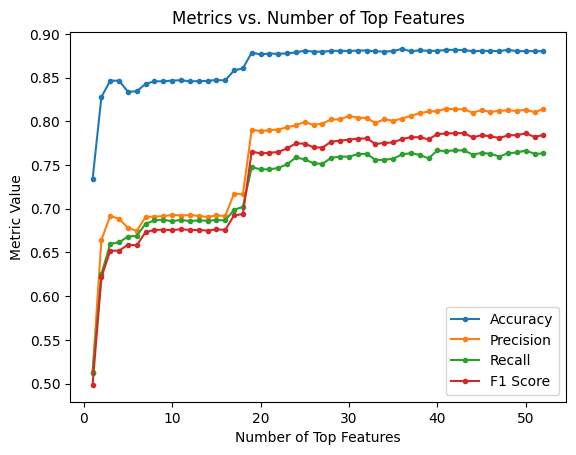

In [61]:
# Plot accuracy
plt.plot(results['num_features'], results['accuracy'], label='Accuracy', marker='.')

# Plot precision
plt.plot(results['num_features'], results['precision'], label='Precision', marker='.')

# Plot recall
plt.plot(results['num_features'], results['recall'], label='Recall', marker='.')

# Plot F1 score
plt.plot(results['num_features'], results['f1'], label='F1 Score', marker='.')

# Set labels and title
plt.xlabel('Number of Top Features')
plt.ylabel('Metric Value')
plt.title('Metrics vs. Number of Top Features')
plt.legend()

# Find the index where each metric is maximized
idx_max_accuracy = results['accuracy'].index(max(results['accuracy']))
idx_max_precision = results['precision'].index(max(results['precision']))
idx_max_recall = results['recall'].index(max(results['recall']))
idx_max_f1 = results['f1'].index(max(results['f1']))

# Print the number of features and value where each metric is maximized
print(f"Max Accuracy at {results['num_features'][idx_max_accuracy]} features with value {max(results['accuracy'])}")
print(f"Max Precision at {results['num_features'][idx_max_precision]} features with value {max(results['precision'])}")
print(f"Max Recall at {results['num_features'][idx_max_recall]} features with value {max(results['recall'])}")
print(f"Max F1 Score at {results['num_features'][idx_max_f1]} features with value {max(results['f1'])}")


# Show the plot
plt.show()

In [44]:
# Sort features by importance in descending order
sorted_feature_importances = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)

# Print the names of the top features and their importance scores
for feature, importance in sorted_feature_importances:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Delta Time__absolute_maximum, Importance: 0.003763593708188839
Feature: Sequence Number__variance, Importance: 0.0025460161843786156
Feature: Delta Time__standard_deviation, Importance: 0.002443375678217412
Feature: FCF Zigbee__length, Importance: 0.0019215404393880687
Feature: Length__root_mean_square, Importance: 0.001424329709529902
Feature: Length__mean, Importance: 0.0014152103074828153
Feature: Payload Length__root_mean_square, Importance: 0.0013652612999768545
Feature: Delta Time__minimum, Importance: 0.0012143199872653387
Feature: FCF Zigbee__mean, Importance: 0.0011649075540417395
Feature: Payload Length__length, Importance: 0.0011562778054859028
Feature: Length__standard_deviation, Importance: 0.001060589515971633
Feature: Delta Time__variance, Importance: 0.0010003878420555608
Feature: Length__sum_values, Importance: 0.0009912510041827285
Feature: Length__absolute_maximum, Importance: 0.00098186298306968
Feature: Sequence Number__length, Importance: 0.00095336814833

In [45]:
### -------------------------------------------------- ACTION CLASSIFICATION -------------------------------------------------- ###

df = df.merge(ground_truth_df[['Action']], left_index=True, right_index=True, how='left')
grouped = df.groupby('Source Zigbee')['Action'].apply(set)

In [6]:
action_counts = df.groupby('Source Zigbee')['Action'].value_counts()

In [7]:
for device in grouped.index:
    if device in devices:
        first_value = True
        for value in grouped[device]:
            if first_value:
                print(f"{device}: {value}")
                first_value = False
            else:
                print(f"\t{value}")

0x0000: Move to Level with OnOff (0x04)
	Get Group Membership (0x02)
	APS: Ack
	Ack
	Move to Color (0x07)
	Rejoin Response (0x07)
	On (0x01)
	Default Response (0x0b)
	Configure Reporting (0x06)
	Move to Color Temperature (0x0a)
	Read Attributes (0x00)
	Route Reply (0x02)
	Color Loop Set (0x44)
	Off (0x00)
	zdp
	Link Status
	Read Attributes Response (0x01)
0x0112: APS: Ack
	Ack
	Report Attributes (0x0a)
	Default Response (0x0b)
	Route Reply (0x02)
	---
	Get Group Membership Response (0x02)
	Rejoin Response (0x07)
	zdp
	Link Status
0x059b: APS: Ack
	Ack
	Report Attributes (0x0a)
	Rejoin Request (0x06)
	Route Record (0x05)
	zdp
0x187a: Ack
	Report Attributes (0x0a)
	Rejoin Request (0x06)
	Route Record (0x05)
	zdp
0x1cd8: APS: Ack
	Ack
	Report Attributes (0x0a)
	Route Record (0x05)
	Default Response (0x0b)
	Route Reply (0x02)
	---
	Get Group Membership Response (0x02)
	Rejoin Response (0x07)
	zdp
	Link Status
	Read Attributes Response (0x01)
0x1e15: APS: Ack
	Ack
	Report Attributes (0x0a)


In [132]:
# Create a list of actions for a certain class and select the rows of the train matrix that correspond to the class

# List to keep track of the device class of each train source
device_address_list = []
class_considered = 'Motion'

for i in range(len(coordinator_final_df)):
    train = coordinator_final_df.loc[i]
    device_address_list.append(device_type_mapping[train[0]['Source Zigbee']])

device_address_series = pd.Series(device_address_list)
mask = (device_address_series == class_considered)

mask_index = [int(i) for i in mask.index[mask]]

action_list = []
for i in range(len(coordinator_final_df)):
    source_action_list = []
    source = coordinator_final_df.loc[i].loc[0].loc['Source Zigbee']
    for packet in coordinator_final_df.loc[i]:
        if packet is not None and packet.loc['Source Zigbee'] == source:
            if packet.loc['Action'] not in source_action_list:
                source_action_list.append(packet.loc['Action'])

    # Get the action with highest priority within the actions performed by the source
    highest_priority_action = get_highest_priority_action(device_name_mapping[source], source_action_list)
    
    action_list.append(highest_priority_action)

filtered_action_list = [action_list[i] for i in mask.index[mask]]
filtered_device_list = [device_address_list[i] for i in mask.index[mask]]

matrix_action = matrix_for_binn[mask_index]

In [133]:
filtered_action_series = pd.Series(filtered_action_list)

# Use value_counts() on the Series
value_counts_result = filtered_action_series.value_counts()

# Print the result
print(value_counts_result)

Report Attributes (0x0a)                  394
Zone Status Change Notification (0x00)     61
APS: Ack                                    4
Route Record (0x05)                         2
Name: count, dtype: int64


In [136]:
# Create a list of actions for a certain class and select the rows of the test matrix that correspond to the class

# List to keep track of the device class of each train source
test_device_address_list = []

for i in range(len(coordinator_final_df)):
    train = coordinator_final_df.loc[i]
    test_device_address_list.append(device_type_mapping[train[0]['Source Zigbee']])

test_device_address_series = pd.Series(test_device_address_list)
mask = (test_device_address_series == class_considered)

mask_index = [int(i) for i in mask.index[mask]]

test_action_list = []
for i in range(len(coordinator_final_df)):
    source_action_list = []
    source = coordinator_final_df.loc[i].loc[0].loc['Source Zigbee']
    for packet in coordinator_final_df.loc[i]:
        if packet is not None and packet.loc['Source Zigbee'] == source:
            if packet.loc['Action'] not in source_action_list:
                source_action_list.append(packet.loc['Action'])

    # Get the action with highest priority within the actions performed by the source
    highest_priority_action = get_highest_priority_action(device_name_mapping[source], source_action_list)
    
    test_action_list.append(highest_priority_action)

test_filtered_action_list = [test_action_list[i] for i in mask.index[mask]]
test_filtered_device_list = [test_device_address_list[i] for i in mask.index[mask]]

test_matrix_action = test_matrix[mask_index]

In [137]:
filtered_action_series = pd.Series(test_filtered_action_list)

# Use value_counts() on the Series
value_counts_result = filtered_action_series.value_counts()

# Print the result
print(value_counts_result)

Report Attributes (0x0a)                  129
Zone Status Change Notification (0x00)    127
APS: Ack                                   15
---                                         1
Rejoin Request (0x06)                       1
Name: count, dtype: int64


In [138]:
# Train and testing on different dataset

import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import Callback, ModelCheckpoint

# Encode the device address
encoder = LabelEncoder()
all_action_list = np.concatenate([filtered_action_list, test_filtered_action_list])
encoder.fit(all_action_list)
encoded_actions = encoder.transform(all_action_list)
encoded_Y = encoder.transform(filtered_action_list)
encoded_Y_test = encoder.transform(test_filtered_action_list)

# Select features to use
features_to_use = [0, 1, 2, 3]
num_of_features = len(features_to_use)

X_train = matrix_action[:, :, features_to_use]
y_train = encoded_Y
X_test = test_matrix_action[:, :, features_to_use]
y_test = encoded_Y_test

number_of_epochs = 30

sampling = False

if sampling:
    # Convert device_address_list to numpy array for easy indexing
    labels = np.array(encoded_Y)

    # Identify the unique class labels
    unique_classes = np.unique(labels)

    # Initialize empty lists to store the balanced dataset
    balanced_features = []
    balanced_labels = []

    # Set the desired number of samples per class
    samples_per_class = 200

    # Iterate over each class and perform class-wise sampling
    for class_label in unique_classes:
        # Get indices of instances belonging to the current class
        class_indices = np.where(labels == class_label)[0]

        # Check if the class has enough samples for sampling
        if len(class_indices) >= samples_per_class:
            # Sample a fixed number of instances from the current class
            sampled_indices = resample(class_indices, n_samples=samples_per_class, replace=False, random_state=42)

            # Append the sampled instances to the balanced dataset
            balanced_features.extend(matrix_for_binn[sampled_indices][:, :, features_to_use])
            balanced_labels.extend(labels[sampled_indices])
        else:
            # If the class has fewer than 50 samples, include all of them
            balanced_features.extend(matrix_for_binn[class_indices][:, :, features_to_use])
            balanced_labels.extend(labels[class_indices])

    # Convert the balanced dataset to numpy arrays
    balanced_features = np.array(balanced_features)
    balanced_labels = np.array(balanced_labels)

    X_train = balanced_features
    y_train = balanced_labels
    number_of_epochs = 50

# Custom F1ScoreCallback
class F1ScoreCallback(Callback):
    def __init__(self, validation_data=()):
        super(Callback, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        if self.validation_data is not None:
            x_val, y_val = self.validation_data
            y_pred = self.model.predict(x_val)
            y_pred = tf.argmax(y_pred, axis=1)
            
            f1 = f1_score(y_val, y_pred, average='weighted')
            print(f'F1 Score: {f1}')


# Create the model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(rounded_mean, num_of_features)))
model.add(Bidirectional(LSTM(32)))
#model.add(Bidirectional(LSTM(16)))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(set(encoded_actions)), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Instantiate F1ScoreCallback
f1_callback = F1ScoreCallback(validation_data=(X_test, y_test))

# Instantiate ModelCheckpoint callback
checkpoint_filepath = 'best_model.keras'
model_checkpoint_callback = ModelCheckpoint(checkpoint_filepath, monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model
model.fit(X_train, y_train, epochs=number_of_epochs, validation_data=(X_test, y_test), callbacks=[f1_callback, model_checkpoint_callback])

# Load the best model
print('Loading best model...')
model = tf.keras.models.load_model(checkpoint_filepath)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


Epoch 1/30
9/9 [==============================] - 2s 8ms/step loss: 1.1132 - accuracy: 0.8
F1 Score: 0.3032639002788256

Epoch 1: val_loss improved from inf to 1.82290, saving model to best_model.keras
15/15 [==============================] - 12s 287ms/step - loss: 1.0656 - accuracy: 0.8308 - val_loss: 1.8229 - val_accuracy: 0.4725
Epoch 2/30
9/9 [==============================] - 0s 8ms/step loss: 0.5712 - accuracy: 0.
F1 Score: 0.3032639002788256

Epoch 2: val_loss improved from 1.82290 to 1.27235, saving model to best_model.keras
15/15 [==============================] - 1s 39ms/step - loss: 0.5712 - accuracy: 0.8547 - val_loss: 1.2723 - val_accuracy: 0.4725
Epoch 3/30
9/9 [==============================] - 0s 8ms/step loss: 0.4788 - accuracy: 0.
F1 Score: 0.3032639002788256

Epoch 3: val_loss did not improve from 1.27235
15/15 [==============================] - 1s 38ms/step - loss: 0.4788 - accuracy: 0.8547 - val_loss: 1.3416 - val_accuracy: 0.4725
Epoch 4/30
9/9 [==================

In [139]:
model = tf.keras.models.load_model(checkpoint_filepath)

In [140]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

consensus = False
occurrence_threshold = 35
if consensus:
    # Apply label-wise consensus mechanism
    for label in np.unique(y_test):
        indices = np.where(y_test == label)[0]

        # Check if the label has occurred at least occurrence_threshold times
        if len(indices) >= occurrence_threshold:
            # Identify the most common prediction within each occurrence_threshold group
            for i in range(0, len(indices), occurrence_threshold):
                group_indices = indices[i:i+occurrence_threshold]
                most_frequent_label = np.argmax(np.bincount(y_pred_classes[group_indices]))

                # Replace all predictions for this label within the group with the most common value
                y_pred_classes[group_indices] = most_frequent_label

decoded_y_test = encoder.inverse_transform(y_test)
decoded_y_pred_classes = encoder.inverse_transform(y_pred_classes)

classes = sorted(set(test_filtered_action_list))

print(classification_report(decoded_y_test, decoded_y_pred_classes, target_names=classes))

cm = confusion_matrix(decoded_y_test, decoded_y_pred_classes, normalize='true', labels=classes)

plt.figure(figsize=(4, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
#plt.title('Confusion Matrix first 4 features with sampling')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, f"{cm[i, j]:.2f}", ha='center', va='center', color='white' if cm[i, j] > 0.5 else 'black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()
#save_tikzplotlib(plt.gcf(), "events_bulb.tex")

9/9 [==============================] - 2s 8ms/step
                                        precision    recall  f1-score   support

                                   ---       0.00      0.00      0.00         1
                              APS: Ack       0.86      0.40      0.55        15
                 Rejoin Request (0x06)       0.00      0.00      0.00         1
              Report Attributes (0x0a)       0.90      0.82      0.86       129
Zone Status Change Notification (0x00)       0.84      0.98      0.90       127

                              accuracy                           0.86       273
                             macro avg       0.52      0.44      0.46       273
                          weighted avg       0.86      0.86      0.86       273



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: U

In [35]:
### -------------------------------------------------- TESTING ON DIFFERENT DATASET -------------------------------------------------- ###

training_extracted_features = extracted_features.copy()

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train = training_extracted_features.drop(columns=['Source Zigbee'])
y_train = training_extracted_features['Source Zigbee']

X_test = test_extracted_features.drop(columns=['Source Zigbee'])
y_test = test_extracted_features['Source Zigbee']

# Instantiate the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the RandomForestClassifier
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier on the testing data
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

# Set the occurrence threshold for label-wise consensus
occurrence_threshold = 5
occurrences_used = True

# Identify the most common prediction for each label after every occurrence_threshold occurrences
for label in np.unique(y_test):
    indices = np.where(y_test == label)[0]

    # Check if the label has occurred at least occurrence_threshold times
    if occurrences_used and len(indices) >= occurrence_threshold:
        
        # Identify the most common prediction within each occurrence_threshold group
        for i in range(0, len(indices), occurrence_threshold):
            group_indices = indices[i:i+occurrence_threshold]
            most_frequent_label, _ = np.unique(y_pred[group_indices], return_counts=True)
            most_frequent_label = most_frequent_label[np.argmax(_)]

            # Replace all predictions for this label within the group with the most common value
            y_pred[group_indices] = most_frequent_label
    else:
        most_frequent_label, _ = np.unique(y_pred[indices], return_counts=True)
        most_frequent_label = most_frequent_label[np.argmax(_)]

        # Replace all predictions for this label within the group with the most common value
        y_pred[indices] = most_frequent_label


# Calculate and store metrics for each fold after label-wise consensus
accuracy_consensus = accuracy_score(y_test, y_pred)
precision_consensus = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_consensus = recall_score(y_test, y_pred, average='macro')
f1_consensus = f1_score(y_test, y_pred, average='macro')

print('')
print(f"Accuracy: {accuracy_consensus}")
print(f"Precision: {precision_consensus}")
print(f"Recall: {recall_consensus}")
print(f"F1: {f1_consensus}")

cm = confusion_matrix(y_test, y_pred, normalize='true')
unique_mapped_labels = sorted(set(device_name_mapping.values()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_mapped_labels)
disp.plot(ax=plt.gca(), xticks_rotation='vertical', cmap='Blues')
plt.show()

Accuracy: 0.7153558052434457
Precision: 0.5706680127617954
Recall: 0.4923597478258257
F1: 0.49837849031444875

Accuracy: 0.7578919208132692
Precision: 0.6091045612821979
Recall: 0.5357880491915109
F1: 0.5367018706717505


In [79]:
y_test.value_counts()

Source Zigbee
Coordinator             1654
Power Plug               428
Philips Lamp             282
Ledvance Bulb            240
Smart Socket             209
Aqara Door               188
Sonoff Motion            130
Moes Bulb                119
Philips Motion            99
Aqara Button              82
Sonoff Door               68
Aqara Motion              59
Sonoff Temperature        56
Aqara Vibration           47
Ledvance Smart+ Plug      43
Ledvance Z3 Plug          34
Name: count, dtype: int64

In [80]:
y_train.value_counts()

Source Zigbee
Coordinator             2421
Power Plug               766
Smart Socket             625
Philips Lamp             309
Ledvance Bulb            264
Philips Motion           204
Aqara Motion             190
Sonoff Temperature       142
Aqara Door               132
Aqara Button             122
Sonoff Door              112
Sonoff Motion             67
Ledvance Z3 Plug          58
Ledvance Smart+ Plug      56
Aqara Vibration           51
Moes Bulb                 14
Name: count, dtype: int64

In [42]:
np.__version__

'1.25.2'